<div style="display: flex; background-color: RGB(235, 150, 122);" >
<h1 style="margin: auto; padding: 30px; "> REALISER UNE ETUDE DE MARCHE AVEC PYTHON</h1>
</div

# CONTEXTE

La poule qui chante est une entreprise française d'elevage et de vente de poulets en France.

Aujourd'hui, elle souhaite se développer à l'international.


Pour ce projet de développement, une étude de marché est réalisée pour analyser les facteurs environnementaux des pays\
et cibler les pays potentiels pour exporter nos produits

<div style="background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">1.2 - Chargement des fichiers</h3>
</div>

In [2]:
dispo_alimentaire = pd.read_excel("Disponibilite Alimentaire_2018.xls")

population = pd.read_excel("Population_2015_2018.xls")

pib= pd.read_excel("Croissance du PIB.xls")

cts_export= pd.read_excel("Couts export.xls")

stabilite_pol = pd.read_excel("Stabilite politique.xls")

infra_logistique = pd.read_excel("Infrastructure logistique.xls")

<div style="background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Préparation et nettoyage des fichiers</h2>
</div>

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">2.1 - Fichier : Disponibilités alimentaires</h3>
</div>

In [3]:
# Visualisation des premières et dernières lignes
dispo_alimentaire

,Code Domaine,Domaine,Code zone (ISO3),Zone,Code Élément,Élément,Code Produit (FBS),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FBS,Bilans Alimentaires (2010-),AFG,Afghanistan,5511,Production,S2734,Viande de Volailles,2018,2018,1000 t,29,I,Valeur imputée,NaN
1,FBS,Bilans Alimentaires (2010-),AFG,Afghanistan,5611,Importations - quantité,S2734,Viande de Volailles,2018,2018,1000 t,25,I,Valeur imputée,NaN
2,FBS,Bilans Alimentaires (2010-),AFG,Afghanistan,5142,Nourriture,S2734,Viande de Volailles,2018,2018,1000 t,53,I,Valeur imputée,NaN
3,FBS,Bilans Alimentaires (2010-),ZAF,Afrique du Sud,5511,Production,S2734,Viande de Volailles,2018,2018,1000 t,1762,I,Valeur imputée,NaN
4,FBS,Bilans Alimentaires (2010-),ZAF,Afrique du Sud,5611,Importations - quantité,S2734,Viande de Volailles,2018,2018,1000 t,515,I,Valeur imputée,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,FBS,Bilans Alimentaires (2010-),ZMB,Zambie,5611,Importations - quantité,S2734,Viande de Volailles,2018,2018,1000 t,11,I,Valeur imputée,NaN
537,FBS,Bilans Alimentaires (2010-),ZMB,Zambie,5142,Nourriture,S2734,Viande de Volailles,2018,2018,1000 t,59,I,Valeur imputée,NaN
538,FBS,Bilans Alimentaires (2010-),ZWE,Zimbabwe,5511,Production,S2734,Viande de Volailles,2018,2018,1000 t,62,I,Valeur imputée,NaN
539,FBS,Bilans Alimentaires (2010-),ZWE,Zimbabwe,5611,Importations - quantité,S2734,Viande de Volailles,2018,2018,1000 t,4,I,Valeur imputée,NaN


In [4]:
#Pivoter le dataframe pour avoir les variables en colonnes
dispo_alimentaire = pd.pivot_table(dispo_alimentaire, index=["Code zone (ISO3)","Zone"],
                                   columns="Élément", values="Valeur").reset_index()


dispo_alimentaire

Élément,Code zone (ISO3),Zone,Importations - quantité,Nourriture,Production
0,AFG,Afghanistan,25.0,53.0,29.0
1,AGO,Angola,335.0,376.0,41.0
2,ALB,Albanie,12.0,27.0,16.0
3,ARE,Émirats arabes unis,612.0,303.0,47.0
4,ARG,Argentine,12.0,1963.0,2115.0
...,...,...,...,...,...
176,WSM,Samoa,18.0,17.0,0.0
177,YEM,Yémen,97.0,279.0,183.0
178,ZAF,Afrique du Sud,515.0,2156.0,1762.0
179,ZMB,Zambie,11.0,59.0,50.0


In [5]:
#Analyse de l'ensemble des variables du jeu de données
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Code zone (ISO3)         181 non-null    object 
 1   Zone                     181 non-null    object 
 2   Importations - quantité  181 non-null    float64
 3   Nourriture               181 non-null    float64
 4   Production               179 non-null    float64
dtypes: float64(3), object(2)
memory usage: 7.2+ KB


In [6]:
#Harmoniser les valeurs, multiplier par 1000000 pour avoir les valeurs en kg

dispo_alimentaire[["Importations - quantité","Nourriture","Production"]] *= 1000000
dispo_alimentaire

Élément,Code zone (ISO3),Zone,Importations - quantité,Nourriture,Production
0,AFG,Afghanistan,25000000.0,5.300000e+07,2.900000e+07
1,AGO,Angola,335000000.0,3.760000e+08,4.100000e+07
2,ALB,Albanie,12000000.0,2.700000e+07,1.600000e+07
3,ARE,Émirats arabes unis,612000000.0,3.030000e+08,4.700000e+07
4,ARG,Argentine,12000000.0,1.963000e+09,2.115000e+09
...,...,...,...,...,...
176,WSM,Samoa,18000000.0,1.700000e+07,0.000000e+00
177,YEM,Yémen,97000000.0,2.790000e+08,1.830000e+08
178,ZAF,Afrique du Sud,515000000.0,2.156000e+09,1.762000e+09
179,ZMB,Zambie,11000000.0,5.900000e+07,5.000000e+07


In [7]:
#Analyse descriptive de l'ensemble des variables
dispo_alimentaire.describe(include="all")

Élément,Code zone (ISO3),Zone,Importations - quantité,Nourriture,Production
count,181,181,1.810000e+02,1.810000e+02,1.790000e+02
unique,181,181,NaN,NaN,NaN
top,AFG,Afghanistan,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN
mean,NaN,NaN,9.693370e+07,7.854696e+08,8.330838e+08
std,NaN,NaN,2.158834e+08,2.692467e+09,2.941302e+09
min,NaN,NaN,0.000000e+00,2.000000e+06,0.000000e+00
25%,NaN,NaN,3.000000e+06,2.900000e+07,1.100000e+07
50%,NaN,NaN,1.800000e+07,1.080000e+08,7.400000e+07
75%,NaN,NaN,8.800000e+07,3.300000e+08,3.510000e+08


In [8]:
# Affichage des lignes avec des valeurs nulles
dispo_alimentaire[dispo_alimentaire["Production"].isna()]

Élément,Code zone (ISO3),Zone,Importations - quantité,Nourriture,Production
41,DJI,Djibouti,3000000.0,3000000.0,NaN
104,MDV,Maldives,13000000.0,8000000.0,NaN


Nous avons deux pays avec des valeurs nulles pour la production:
Djibouti et Maldive ne semble pas avoir d'élevage de volaille en 2018 et se contente de la disponibilité des importations

Je remplace les valeurs nulles par 0

In [9]:
dispo_alimentaire["Production"] = dispo_alimentaire["Production"].fillna(0)

In [10]:
# Renommer les colonnes

dispo_alimentaire.rename(columns={"Importations - quantité":"Importations (kg)","Code zone (ISO3)":"Code",
                         "Nourriture":"Nourriture (kg)","Production":"Production (kg)"},inplace=True)
dispo_alimentaire

Élément,Code,Zone,Importations (kg),Nourriture (kg),Production (kg)
0,AFG,Afghanistan,25000000.0,5.300000e+07,2.900000e+07
1,AGO,Angola,335000000.0,3.760000e+08,4.100000e+07
2,ALB,Albanie,12000000.0,2.700000e+07,1.600000e+07
3,ARE,Émirats arabes unis,612000000.0,3.030000e+08,4.700000e+07
4,ARG,Argentine,12000000.0,1.963000e+09,2.115000e+09
...,...,...,...,...,...
176,WSM,Samoa,18000000.0,1.700000e+07,0.000000e+00
177,YEM,Yémen,97000000.0,2.790000e+08,1.830000e+08
178,ZAF,Afrique du Sud,515000000.0,2.156000e+09,1.762000e+09
179,ZMB,Zambie,11000000.0,5.900000e+07,5.000000e+07


In [11]:
#Vérification des doublons 
dispo_alimentaire[dispo_alimentaire["Zone"].duplicated()]

Élément,Code,Zone,Importations (kg),Nourriture (kg),Production (kg)


In [12]:
#Analyse descriptive des variables quantitatives
dispo_alimentaire.describe()


Élément,Importations (kg),Nourriture (kg),Production (kg)
count,1.810000e+02,1.810000e+02,1.810000e+02
mean,9.693370e+07,7.854696e+08,8.238785e+08
std,2.158834e+08,2.692467e+09,2.926219e+09
min,0.000000e+00,2.000000e+06,0.000000e+00
25%,3.000000e+06,2.900000e+07,1.000000e+07
50%,1.800000e+07,1.080000e+08,7.000000e+07
75%,8.800000e+07,3.300000e+08,3.490000e+08
max,1.575000e+09,2.104600e+10,2.229800e+10


Les valeurs semblent être cohérentes 

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">2.2 - Fichier : Population</h3>
</div>

In [13]:
#Visualiser les premières et dernières lignes du dataframe
population

,Code Domaine,Domaine,Code,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,AFG,Afghanistan,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,33753.499,X,Ciffre de sources internationales,NaN
1,OA,Séries temporelles annuelles,AFG,Afghanistan,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,34636.207,X,Ciffre de sources internationales,NaN
2,OA,Séries temporelles annuelles,AFG,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,35643.418,X,Ciffre de sources internationales,NaN
3,OA,Séries temporelles annuelles,AFG,Afghanistan,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,36686.784,X,Ciffre de sources internationales,NaN
4,OA,Séries temporelles annuelles,ZAF,Afrique du Sud,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,55876.504,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,OA,Séries temporelles annuelles,ZMB,Zambie,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,17835.893,X,Ciffre de sources internationales,NaN
936,OA,Séries temporelles annuelles,ZWE,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,14154.937,X,Ciffre de sources internationales,NaN
937,OA,Séries temporelles annuelles,ZWE,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14452.704,X,Ciffre de sources internationales,NaN
938,OA,Séries temporelles annuelles,ZWE,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14751.101,X,Ciffre de sources internationales,NaN


In [14]:
#Création d'une variable croissance population, pour ce faire je pivote la population total pour chaque pays par année

population = pd.pivot_table(population, index=["Code", "Zone"], columns="Année", values="Valeur").reset_index()

population

Année,Code,Zone,2015,2016,2017,2018
0,ABW,Aruba,104.257,104.874,105.439,105.962
1,AFG,Afghanistan,33753.499,34636.207,35643.418,36686.784
2,AGO,Angola,28127.721,29154.746,30208.628,31273.533
3,AIA,Anguilla,14.525,14.813,15.015,15.181
4,ALB,Albanie,2882.481,2881.063,2879.355,2877.013
...,...,...,...,...,...,...
230,WSM,Samoa,203.571,205.544,207.630,209.701
231,YEM,Yémen,28516.545,29274.002,30034.389,30790.513
232,ZAF,Afrique du Sud,55876.504,56422.274,56641.209,57339.635
233,ZMB,Zambie,16248.230,16767.761,17298.054,17835.893


In [15]:
#Création de la variable croissance population de 2015 à 2018
population["Croissance_Pop (%)"] = round(((population[2018] - population[2015])/population[2015])*100,2)

population

Année,Code,Zone,2015,2016,2017,2018,Croissance_Pop (%)
0,ABW,Aruba,104.257,104.874,105.439,105.962,1.64
1,AFG,Afghanistan,33753.499,34636.207,35643.418,36686.784,8.69
2,AGO,Angola,28127.721,29154.746,30208.628,31273.533,11.18
3,AIA,Anguilla,14.525,14.813,15.015,15.181,4.52
4,ALB,Albanie,2882.481,2881.063,2879.355,2877.013,-0.19
...,...,...,...,...,...,...,...
230,WSM,Samoa,203.571,205.544,207.630,209.701,3.01
231,YEM,Yémen,28516.545,29274.002,30034.389,30790.513,7.97
232,ZAF,Afrique du Sud,55876.504,56422.274,56641.209,57339.635,2.62
233,ZMB,Zambie,16248.230,16767.761,17298.054,17835.893,9.77


In [16]:
#Suppression des colonnes inutiles

population = population[["Code","Zone",2018,"Croissance_Pop (%)"]]
population

Année,Code,Zone,2018,Croissance_Pop (%)
0,ABW,Aruba,105.962,1.64
1,AFG,Afghanistan,36686.784,8.69
2,AGO,Angola,31273.533,11.18
3,AIA,Anguilla,15.181,4.52
4,ALB,Albanie,2877.013,-0.19
...,...,...,...,...
230,WSM,Samoa,209.701,3.01
231,YEM,Yémen,30790.513,7.97
232,ZAF,Afrique du Sud,57339.635,2.62
233,ZMB,Zambie,17835.893,9.77


In [17]:
#Renommer la colonne '2018' par Population 

population = population.rename(columns={2018:"Population"})

population

Année,Code,Zone,Population,Croissance_Pop (%)
0,ABW,Aruba,105.962,1.64
1,AFG,Afghanistan,36686.784,8.69
2,AGO,Angola,31273.533,11.18
3,AIA,Anguilla,15.181,4.52
4,ALB,Albanie,2877.013,-0.19
...,...,...,...,...
230,WSM,Samoa,209.701,3.01
231,YEM,Yémen,30790.513,7.97
232,ZAF,Afrique du Sud,57339.635,2.62
233,ZMB,Zambie,17835.893,9.77


In [18]:
#Harmoniser les valeurs en multipliant par 1000 pour avoir le nombre total de la population
population["Population"] *= 1000
population

Année,Code,Zone,Population,Croissance_Pop (%)
0,ABW,Aruba,105962.0,1.64
1,AFG,Afghanistan,36686784.0,8.69
2,AGO,Angola,31273533.0,11.18
3,AIA,Anguilla,15181.0,4.52
4,ALB,Albanie,2877013.0,-0.19
...,...,...,...,...
230,WSM,Samoa,209701.0,3.01
231,YEM,Yémen,30790513.0,7.97
232,ZAF,Afrique du Sud,57339635.0,2.62
233,ZMB,Zambie,17835893.0,9.77


In [19]:
#Analyse de l'ensemble des variables du jeu de données
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                235 non-null    object 
 1   Zone                235 non-null    object 
 2   Population          235 non-null    float64
 3   Croissance_Pop (%)  235 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.5+ KB


In [20]:
#Vérification des doublons 
population[population["Code"].duplicated()]

Année,Code,Zone,Population,Croissance_Pop (%)


In [21]:
#Vérification de l'ensemble des pays 
population["Zone"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albanie', 'Andorre',
       'Émirats arabes unis', 'Argentine', 'Arménie', 'Samoa américaines',
       'Antigua-et-Barbuda', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Burundi', 'Belgique', 'Bénin', 'Bonaire, Saint-Eustache et Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgarie', 'Bahreïn', 'Bahamas',
       'Bosnie-Herzégovine', 'Saint-Barthélemy', 'Bélarus', 'Belize',
       'Bermudes', 'Bolivie (État plurinational de)', 'Brésil', 'Barbade',
       'Brunéi Darussalam', 'Bhoutan', 'Botswana',
       'République centrafricaine', 'Canada', 'Suisse', 'Chili',
       'Chine, continentale', "Côte d'Ivoire", 'Cameroun',
       'République démocratique du Congo', 'Congo', 'Îles Cook',
       'Colombie', 'Comores', 'Cabo Verde', 'Costa Rica', 'Cuba',
       'Curaçao', 'Îles Caïmanes', 'Chypre', 'Tchéquie', 'Allemagne',
       'Djibouti', 'Dominique', 'Danemark', 'République dominicaine',
       'Algérie', 'Équateur', 'Égypte', 'Éryt

In [22]:
# le pays Chine est présent plusieurs fois, à vérifier
population[population["Zone"].str.contains("Chine")]

Année,Code,Zone,Population,Croissance_Pop (%)
38,CHN,"Chine, continentale",1.417069e+09,1.68
66,F351,Chine,1.448928e+09,1.66
90,HKG,Chine - RAS de Hong-Kong,7.481555e+06,1.10
126,MAC,Chine - RAS de Macao,6.509910e+05,5.81
215,TWN,"Chine, Taiwan Province de",2.372618e+07,0.91


In [23]:
#Suppression du Pays Chine ligne 66 car semble regrouper plusieurs pays (Hong Kong, Macao et Taiwan) 
population.drop(index=(66), axis=0, inplace=True)


In [24]:
#Analyse descriptive des variables 
population.describe(include="all")

Année,Code,Zone,Population,Croissance_Pop (%)
count,234,234,2.340000e+02,234.000000
unique,234,234,NaN,NaN
top,ABW,Aruba,NaN,NaN
freq,1,1,NaN,NaN
mean,NaN,NaN,3.282869e+07,3.598590
std,NaN,NaN,1.338098e+08,4.255371
min,NaN,NaN,5.370000e+02,-13.840000
25%,NaN,NaN,4.099980e+05,0.680000
50%,NaN,NaN,5.443904e+06,3.375000
75%,NaN,NaN,2.027812e+07,6.617500


In [25]:
#Création de la variable population total afin de sélectionner les pays représentant au moins 60% de la population 
#pour l'étude de marché

pop_total = population["Population"].sum()

print("En 2018, la population total est de",round(pop_total/1000000000,2)," milliards d'habitants)")

En 2018, la population total est de 7.68  milliards d'habitants)


<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">2.3 - Fichier : Taux de croissance PIB</h3>
</div>

In [26]:
#Affichage des premières et dernières lignes du dataframe 
pib

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Croissance du PIB (% annuel),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.586575,-0.623626,1.719625,7.048533,2.381730,-2.302836,-23.982581,27.639357,10.458317,NaN
1,NaN,AFE,Croissance du PIB (% annuel),NY.GDP.MKTP.KD.ZG,NaN,0.460106,7.868013,5.616400,4.668135,5.138990,...,3.983182,3.011572,2.183581,2.651400,2.681718,2.189259,-2.780379,4.497380,3.554422,2.622310
2,Afghanistan,AFG,Croissance du PIB (% annuel),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,-6.240172,NaN
3,NaN,AFW,Croissance du PIB (% annuel),NY.GDP.MKTP.KD.ZG,NaN,1.873455,3.707643,7.145784,5.406403,4.102491,...,5.925583,2.813979,0.141489,2.284961,2.842645,3.222029,-1.004417,3.994854,3.784486,3.342776
4,Angola,AGO,Croissance du PIB (% annuel),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.822559,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215,1.199211,3.045403,0.856001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Croissance du PIB (% annuel),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.348805,5.916231,5.571775,4.825656,3.406632,4.756801,-5.340275,10.745656,4.278499,3.337895
262,"Yémen, Rép. du",YEM,Croissance du PIB (% annuel),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.188690,-27.994546,-9.375124,-5.071796,0.752448,NaN,NaN,NaN,NaN,NaN
263,Afrique du Sud,ZAF,Croissance du PIB (% annuel),NY.GDP.MKTP.KD.ZG,NaN,3.844734,6.177931,7.373709,7.939609,6.122798,...,1.413826,1.321862,0.664552,1.157947,1.556784,0.259936,-5.963358,4.703062,1.910406,0.601662
264,Zambie,ZMB,Croissance du PIB (% annuel),NY.GDP.MKTP.KD.ZG,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,...,4.693283,2.920375,3.755100,3.525863,4.034494,1.441306,-2.785055,6.234922,5.249622,5.832474


In [27]:
#Conserver uniquement les données de 2018 dans le dataframe

pib = pib[["Country Name","Country Code","2018"]]
pib

,Country Name,Country Code,2018
0,Aruba,ABW,2.381730
1,NaN,AFE,2.681718
2,Afghanistan,AFG,1.189228
3,NaN,AFW,2.842645
4,Angola,AGO,-1.316362
...,...,...,...
261,Kosovo,XKX,3.406632
262,"Yémen, Rép. du",YEM,0.752448
263,Afrique du Sud,ZAF,1.556784
264,Zambie,ZMB,4.034494


In [28]:
#Renommer la colonne 2018 par PIB (%)
pib = pib.rename(columns={"2018":"PIB (%)"})
pib

,Country Name,Country Code,PIB (%)
0,Aruba,ABW,2.381730
1,NaN,AFE,2.681718
2,Afghanistan,AFG,1.189228
3,NaN,AFW,2.842645
4,Angola,AGO,-1.316362
...,...,...,...
261,Kosovo,XKX,3.406632
262,"Yémen, Rép. du",YEM,0.752448
263,Afrique du Sud,ZAF,1.556784
264,Zambie,ZMB,4.034494


In [29]:
# Analyse descriptive de l'ensemble des variables 
pib.describe(include="all")

,Country Name,Country Code,PIB (%)
count,264,266,258.000000
unique,264,266,NaN
top,Aruba,ABW,NaN
freq,1,1,NaN
mean,NaN,NaN,3.084004
std,NaN,NaN,2.896149
min,NaN,NaN,-19.268850
25%,NaN,NaN,1.840288
50%,NaN,NaN,3.162625
75%,NaN,NaN,4.790671


2 pays nuls et 8 PIB manquants

In [30]:
#Visualiser les valeurs nulles
pib[pib["PIB (%)"].isna() | pib["Country Name"].isna()]


,Country Name,Country Code,PIB (%)
1,NaN,AFE,2.681718
3,NaN,AFW,2.842645
69,Érythrée,ERI,NaN
84,Gibraltar,GIB,NaN
110,Non classifié,INX,NaN
137,Liechtenstein,LIE,NaN
193,"Corée, République démocratique de",PRK,NaN
216,Soudan du Sud,SSD,NaN
254,Venezuela,VEN,NaN
255,Îles Vierges britanniques,VGB,NaN


Suppression des deux pays nuls AFE: Afghanistan pays instable et AFE : non trouvé ainsi que pays non classiffié
Remplacer les PIB par 0 pour les pays restants

In [31]:
pib.drop(index=[1,3,110], axis=0, inplace=True)

pib["PIB (%)"] = pib["PIB (%)"].fillna(0)

In [32]:
pib

,Country Name,Country Code,PIB (%)
0,Aruba,ABW,2.381730
2,Afghanistan,AFG,1.189228
4,Angola,AGO,-1.316362
5,Albanie,ALB,4.019346
6,Andorre,AND,1.588765
...,...,...,...
261,Kosovo,XKX,3.406632
262,"Yémen, Rép. du",YEM,0.752448
263,Afrique du Sud,ZAF,1.556784
264,Zambie,ZMB,4.034494


In [33]:
#Vérification des doublons
pib[pib["Country Code"].duplicated()]

,Country Name,Country Code,PIB (%)


In [34]:
# Analyse descriptive de l'ensemble des variables 
pib.describe(include="all")

,Country Name,Country Code,PIB (%)
count,263,263,263.000000
unique,263,263,NaN
top,Aruba,ABW,NaN
freq,1,1,NaN
mean,NaN,NaN,3.004368
std,NaN,NaN,2.911102
min,NaN,NaN,-19.268850
25%,NaN,NaN,1.729070
50%,NaN,NaN,3.013180
75%,NaN,NaN,4.775960


<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">2.4 - Fichier : Coûts export</h3>
</div>

In [35]:
#Visualisation des premières et dernières lignes
cts_export

,Country Name,Country Code,Indicator Name,Indicator Code,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Region
0,Aruba,ABW,"Coût des procédures d’exportation, formalités ...",IC.EXP.CSBC.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amérique du Sud
1,NaN,AFE,"Coût des procédures d’exportation, formalités ...",IC.EXP.CSBC.CD,553.522633,557.781728,557.781728,557.781728,557.781728,557.781728,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Coût des procédures d’exportation, formalités ...",IC.EXP.CSBC.CD,511.111100,511.111100,452.777800,452.777800,452.777800,452.777800,NaN,NaN,NaN,NaN,Asie du Sud
3,NaN,AFW,"Coût des procédures d’exportation, formalités ...",IC.EXP.CSBC.CD,653.919605,653.919605,660.987786,654.669605,654.669605,654.669605,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Coût des procédures d’exportation, formalités ...",IC.EXP.CSBC.CD,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,NaN,NaN,NaN,NaN,Afrique australe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Coût des procédures d’exportation, formalités ...",IC.EXP.CSBC.CD,153.222200,153.222200,105.000000,105.000000,105.000000,105.000000,NaN,NaN,NaN,NaN,Europe centrale et orientale
262,"Yémen, Rép. du",YEM,"Coût des procédures d’exportation, formalités ...",IC.EXP.CSBC.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moyen-Orient
263,Afrique du Sud,ZAF,"Coût des procédures d’exportation, formalités ...",IC.EXP.CSBC.CD,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,NaN,NaN,NaN,NaN,Afrique australe
264,Zambie,ZMB,"Coût des procédures d’exportation, formalités ...",IC.EXP.CSBC.CD,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,NaN,NaN,NaN,NaN,Afrique australe


In [36]:
#Sélectionner uniquement les données de l'année 2018
cts_export = cts_export[["Country Name","Country Code","2018","Region"]]

cts_export

,Country Name,Country Code,2018,Region
0,Aruba,ABW,NaN,Amérique du Sud
1,NaN,AFE,557.781728,NaN
2,Afghanistan,AFG,452.777800,Asie du Sud
3,NaN,AFW,654.669605,NaN
4,Angola,AGO,825.000000,Afrique australe
...,...,...,...,...
261,Kosovo,XKX,105.000000,Europe centrale et orientale
262,"Yémen, Rép. du",YEM,NaN,Moyen-Orient
263,Afrique du Sud,ZAF,1257.000000,Afrique australe
264,Zambie,ZMB,370.000000,Afrique australe


In [37]:
#Renommer la colonne 2018 par couts_exportations
cts_export = cts_export.rename(columns={"2018":"Couts_export (USD)"})
cts_export

,Country Name,Country Code,Couts_export (USD),Region
0,Aruba,ABW,NaN,Amérique du Sud
1,NaN,AFE,557.781728,NaN
2,Afghanistan,AFG,452.777800,Asie du Sud
3,NaN,AFW,654.669605,NaN
4,Angola,AGO,825.000000,Afrique australe
...,...,...,...,...
261,Kosovo,XKX,105.000000,Europe centrale et orientale
262,"Yémen, Rép. du",YEM,NaN,Moyen-Orient
263,Afrique du Sud,ZAF,1257.000000,Afrique australe
264,Zambie,ZMB,370.000000,Afrique australe


In [38]:
#Analyse descriptive de l'ensemble des variables
cts_export.describe(include="all")


,Country Name,Country Code,Couts_export (USD),Region
count,264,266,236.000000,216
unique,264,266,NaN,24
top,Aruba,ABW,NaN,Caraïbes
freq,1,1,NaN,23
mean,NaN,NaN,397.843063,NaN
std,NaN,NaN,326.999222,NaN
min,NaN,NaN,0.000000,NaN
25%,NaN,NaN,160.817300,NaN
50%,NaN,NaN,352.166650,NaN
75%,NaN,NaN,546.473500,NaN


Valeurs manquantes : 2 pays nuls et 30 valeurs nulles pour la colonne couts_exportations

In [39]:
#Analyse des valeurs nulles
cts_export[cts_export["Couts_export (USD)"].isna() | cts_export["Country Name"].isna()]


,Country Name,Country Code,Couts_export (USD),Region
0,Aruba,ABW,NaN,Amérique du Sud
1,NaN,AFE,557.781728,NaN
3,NaN,AFW,654.669605,NaN
6,Andorre,AND,NaN,Europe de l'Ouest
11,Samoa américaines,ASM,NaN,Iles du Pacifique
27,Bermudes,BMU,NaN,Caraïbes
38,Îles Anglo-Normandes,CHI,NaN,0
50,Cuba,CUB,NaN,Caraïbes
51,Curacao,CUW,NaN,Caraïbes
52,Îles Caïmans,CYM,NaN,Caraïbes


Suppression des deux pays null et pays non classifié
Remplacer les valeurs restantes par 0

In [40]:
cts_export.drop(index=[1,3,110], axis=0, inplace=True)

cts_export["Couts_export (USD)"] = cts_export["Couts_export (USD)"].fillna(0)


In [41]:
#Analyse des doublons
cts_export[cts_export["Country Code"].duplicated()]

,Country Name,Country Code,Couts_export (USD),Region


In [42]:
#Analyse de l'ensmble des données 
cts_export.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 265
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Name        263 non-null    object 
 1   Country Code        263 non-null    object 
 2   Couts_export (USD)  263 non-null    float64
 3   Region              216 non-null    object 
dtypes: float64(1), object(3)
memory usage: 10.3+ KB


La colonne région contient des nulles, elle nous permettra eventuellement de faire la moyenne par région pour imputer\
nos valeurs à 0 dans le dataframe final

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">2.5 - Fichier: Stabilité Politique</h3>
</div>

In [43]:
#Visualisation des premières et dernières lignes du dataframe
stabilite_pol


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Political Stability and Absence of Violence/Te...,PV.PER.RNK,88.151657,93.838860,93.364929,94.786728,92.380951,92.380951,93.333336,95.238098,95.283020,95.754715,96.226418,97.169815,97.641510
1,NaN,AFE,Political Stability and Absence of Violence/Te...,PV.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.PER.RNK,1.421801,1.421801,1.895735,1.421801,2.857143,0.952381,0.952381,0.476190,0.471698,0.943396,0.471698,1.415094,0.471698
3,NaN,AFW,Political Stability and Absence of Violence/Te...,PV.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Political Stability and Absence of Violence/Te...,PV.PER.RNK,37.914692,34.597157,35.071091,35.071091,32.857143,28.095238,33.333332,30.476191,34.905659,31.603773,24.528301,21.226416,22.641510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Political Stability and Absence of Violence/Te...,PV.PER.RNK,14.691943,16.113745,17.061611,18.009480,31.428572,40.476189,35.714287,38.095238,22.169811,32.075470,36.792454,43.396225,37.264153
262,"Yémen, Rép. du",YEM,Political Stability and Absence of Violence/Te...,PV.PER.RNK,1.895735,1.895735,1.421801,1.895735,0.952381,0.476190,0.476190,0.000000,0.000000,0.000000,0.943396,0.943396,1.886792
263,Afrique du Sud,ZAF,Political Stability and Absence of Violence/Te...,PV.PER.RNK,45.023697,48.815166,43.127960,45.023697,40.000000,39.047619,40.000000,34.285713,38.207546,36.320755,39.150944,20.283018,19.811321
264,Zambie,ZMB,Political Stability and Absence of Violence/Te...,PV.PER.RNK,63.033176,63.507111,68.246445,61.611374,52.380951,53.333332,50.000000,52.380951,50.943398,43.396225,43.396225,48.584908,50.000000


In [44]:
# Récupérer les données pour l'année 2018 uniquement
stabilite_pol = stabilite_pol[["Country Name","Country Code","2018"]]
stabilite_pol

,Country Name,Country Code,2018
0,Aruba,ABW,95.283020
1,NaN,AFE,NaN
2,Afghanistan,AFG,0.471698
3,NaN,AFW,NaN
4,Angola,AGO,34.905659
...,...,...,...
261,Kosovo,XKX,22.169811
262,"Yémen, Rép. du",YEM,0.000000
263,Afrique du Sud,ZAF,38.207546
264,Zambie,ZMB,50.943398


In [45]:
# Renommer la colonne 2018 par stabilite_politique

stabilite_pol = stabilite_pol.rename(columns={"2018":"Stabilite_politique (%)"})
stabilite_pol

,Country Name,Country Code,Stabilite_politique (%)
0,Aruba,ABW,95.283020
1,NaN,AFE,NaN
2,Afghanistan,AFG,0.471698
3,NaN,AFW,NaN
4,Angola,AGO,34.905659
...,...,...,...
261,Kosovo,XKX,22.169811
262,"Yémen, Rép. du",YEM,0.000000
263,Afrique du Sud,ZAF,38.207546
264,Zambie,ZMB,50.943398


In [46]:
#Analyse descriptives des l'ensemble de nos variables
stabilite_pol.describe(include="all")

,Country Name,Country Code,Stabilite_politique (%)
count,264,266,205.000000
unique,264,266,NaN
top,Aruba,ABW,NaN
freq,1,1,NaN
mean,NaN,NaN,48.895536
std,NaN,NaN,28.975033
min,NaN,NaN,0.000000
25%,NaN,NaN,24.056604
50%,NaN,NaN,48.113209
75%,NaN,NaN,73.113205


In [47]:
# Visualiser les valeurs nulles
stab_pol_null = stabilite_pol[stabilite_pol["Country Name"].isna() | stabilite_pol["Stabilite_politique (%)"].isna() ]

stab_pol_null

,Country Name,Country Code,Stabilite_politique (%)
1,NaN,AFE,NaN
3,NaN,AFW,NaN
7,Le monde arabe,ARB,NaN
36,Europe centrale et les pays baltes,CEB,NaN
38,Îles Anglo-Normandes,CHI,NaN
...,...,...,...
240,Asie du Sud (BIRD et IDA),TSA,NaN
241,Afrique subsaharienne (BIRD et IDA),TSS,NaN
249,"Revenu intermédiaire, tranche supérieure",UMC,NaN
255,Îles Vierges britanniques,VGB,NaN


In [48]:
#Visualiser l'ensemble des pays contenant des valeurs nulles
stab_pol_null["Country Name"].unique()

array([nan, 'Le monde arabe', 'Europe centrale et les pays baltes',
       'Îles Anglo-Normandes', 'Petits états des Caraïbes', 'Curacao',
       'Asie de l’Est et Pacifique (hors revenu élevé)',
       'de dividende précoce démographique', 'Asie de l’Est et Pacifique',
       'Europe et Asie centrale (hors revenu élevé)',
       'Europe et Asie centrale', 'Zone euro', 'Union européenne',
       'Fragile et les situations de conflit touchées', 'Îles Féroé',
       'Gibraltar', 'Revenu élevé', 'Pays pauvres très endettés (PPTE)',
       'BIRD seulement', 'BIRD et IDA', 'IDA totale', 'IDA mélange',
       'IDA seulement', 'Île de Man', 'Non classifié',
       'Amérique latine et Caraïbes (hors revenu élevé)',
       'Amérique latine et Caraïbes',
       'Pays les moins avancés: classement de l’ONU', 'Faible revenu',
       'Revenu intermédiaire, tranche inférieure',
       'Revenu faible et intermédiaire',
       'de dividende tardif démographique', 'Saint-Martin (fr)',
       'Afrique d

Suppression des lignes contenant des valeurs nulles, une bonne majorité ne sont pas des pays

In [49]:
stabilite_pol.drop(stab_pol_null.index, axis=0, inplace=True)


In [50]:
#Vérifier les doublons
#stabilite_pol[stabilite_pol["Country Code"].duplicated()]
stabilite_pol[stabilite_pol["Country Code"].duplicated()]

,Country Name,Country Code,Stabilite_politique (%)


In [51]:
#Analyse les données globales du jeu de donnée
stabilite_pol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 265
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country Name             205 non-null    object 
 1   Country Code             205 non-null    object 
 2   Stabilite_politique (%)  205 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">2.6 - Fichier: Infrastructure logistique</h3>
</div>

In [52]:
#Visualisation des premières et dernières lignes du dataframe
infra_logistique

,Country Name,Country Code,Indicator Name,Indicator Code,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Indice de performance logistique : Qualité de ...,LP.LPI.INFR.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AFE,Indice de performance logistique : Qualité de ...,LP.LPI.INFR.XQ,2.284842,NaN,2.392239,NaN,2.237778,NaN,NaN,NaN,2.518182,NaN
2,Afghanistan,AFG,Indice de performance logistique : Qualité de ...,LP.LPI.INFR.XQ,1.818951,NaN,1.835473,NaN,1.810000,NaN,NaN,NaN,1.700000,NaN
3,NaN,AFW,Indice de performance logistique : Qualité de ...,LP.LPI.INFR.XQ,2.252968,NaN,2.177056,NaN,2.172857,NaN,NaN,NaN,2.293333,NaN
4,Angola,AGO,Indice de performance logistique : Qualité de ...,LP.LPI.INFR.XQ,2.105263,NaN,2.133789,NaN,1.860000,NaN,NaN,NaN,2.100000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Indice de performance logistique : Qualité de ...,LP.LPI.INFR.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yémen, Rép. du",YEM,Indice de performance logistique : Qualité de ...,LP.LPI.INFR.XQ,1.874070,NaN,NaN,NaN,2.120000,NaN,NaN,NaN,1.900000,NaN
263,Afrique du Sud,ZAF,Indice de performance logistique : Qualité de ...,LP.LPI.INFR.XQ,3.200000,NaN,3.776261,NaN,3.190000,NaN,NaN,NaN,3.600000,NaN
264,Zambie,ZMB,Indice de performance logistique : Qualité de ...,LP.LPI.INFR.XQ,2.310606,NaN,2.262771,NaN,2.300000,NaN,NaN,NaN,NaN,NaN


In [53]:
#Suppression des colonnes inutiles
infra_logistique = infra_logistique[["Country Name", "Country Code", "2018"]]
infra_logistique

,Country Name,Country Code,2018
0,Aruba,ABW,NaN
1,NaN,AFE,2.237778
2,Afghanistan,AFG,1.810000
3,NaN,AFW,2.172857
4,Angola,AGO,1.860000
...,...,...,...
261,Kosovo,XKX,NaN
262,"Yémen, Rép. du",YEM,2.120000
263,Afrique du Sud,ZAF,3.190000
264,Zambie,ZMB,2.300000


In [54]:
# Renommer la colonne 2018 par infrastructure_log

infra_logistique = infra_logistique.rename(columns={"2018":"Infra_logistique (idx)"})
infra_logistique

,Country Name,Country Code,Infra_logistique (idx)
0,Aruba,ABW,NaN
1,NaN,AFE,2.237778
2,Afghanistan,AFG,1.810000
3,NaN,AFW,2.172857
4,Angola,AGO,1.860000
...,...,...,...
261,Kosovo,XKX,NaN
262,"Yémen, Rép. du",YEM,2.120000
263,Afrique du Sud,ZAF,3.190000
264,Zambie,ZMB,2.300000


In [55]:
#Analyser descriptive de l'ensemble des variables

infra_logistique.describe(include="all")

,Country Name,Country Code,Infra_logistique (idx)
count,264,266,207.000000
unique,264,266,NaN
top,Aruba,ABW,NaN
freq,1,1,NaN
mean,NaN,NaN,2.685581
std,NaN,NaN,0.628454
min,NaN,NaN,1.560000
25%,NaN,NaN,2.217054
50%,NaN,NaN,2.490000
75%,NaN,NaN,3.035476


In [56]:
# Visualiser les valeurs nulles
infra_null =infra_logistique[infra_logistique["Country Name"].isna() | infra_logistique["Infra_logistique (idx)"].isna() ]
infra_null

,Country Name,Country Code,Infra_logistique (idx)
0,Aruba,ABW,NaN
1,NaN,AFE,2.237778
3,NaN,AFW,2.172857
6,Andorre,AND,NaN
11,Samoa américaines,ASM,NaN
...,...,...,...
255,Îles Vierges britanniques,VGB,NaN
256,Îles Vierges (EU),VIR,NaN
258,Vanuatu,VUT,NaN
260,Samoa,WSM,NaN


In [57]:
#Afficher les pays contenant des valeurs nulles

infra_null["Country Name"].unique()

array(['Aruba', nan, 'Andorre', 'Samoa américaines', 'Antigua-et-Barbuda',
       'Azerbaïdjan', 'Belize', 'Bermudes', 'Barbade', 'Botswana',
       'Îles Anglo-Normandes', 'Cabo Verde', 'Curacao', 'Îles Caïmans',
       'Dominique', 'Éthiopie', 'Îles Féroé',
       'Micronésie, États fédérés de', 'Gibraltar', 'Grenade',
       'Groenland', 'Guam', 'Île de Man', 'Non classifié', 'Kiribati',
       'Saint-Kitts-et-Nevis', 'Sainte-Lucie', 'Liechtenstein',
       'Région administrative spéciale de Macao, Chine',
       'Saint-Martin (fr)', 'Monaco', 'Îles Marshall', 'Mariannes',
       'Mozambique', 'Namibie', 'Nouvelle-Calédonie', 'Nicaragua',
       'Nauru', 'Palaos', 'Porto Rico',
       'Corée, République démocratique de', 'Cisjordanie et Gaza',
       'Polynésie française', 'Saint-Marin', 'Soudan du Sud', 'Suriname',
       'Eswatini', 'Sint Maarten (Dutch part)', 'Seychelles',
       'Îles Turques-et-Caïques', 'Timor-Leste', 'Tonga', 'Tuvalu',
       'Tanzanie', 'Saint-Vincent-et-le

2 pays nuls toujours les mêmes et du pays non classifié, 59 valeurs manquantes sur les indices des infrastructures logistique\
Suppression des 2 pays et remplacer par 0 les valeurs manquantes concernant les indices d'infrastructure logistique

In [58]:
infra_logistique.drop(index=[1,3,110], axis=0, inplace=True)

infra_logistique["Infra_logistique (idx)"] = infra_logistique["Infra_logistique (idx)"].fillna(0)


In [59]:
#Vérifier les doublons

infra_logistique.loc[infra_logistique["Country Code"].duplicated()]

,Country Name,Country Code,Infra_logistique (idx)


In [60]:
#Analyse de l'ensemble du dataframe
infra_logistique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 265
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Name            263 non-null    object 
 1   Country Code            263 non-null    object 
 2   Infra_logistique (idx)  263 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.2+ KB


<div style="background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Fusion des fichiers</h2>
</div>

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">3.1 - Fusion des fichiers Disponibilité Alimentaire et  Population</h3>
</div>

In [61]:
#1er fusion : fichiers disponibilité_Alimentaire et Population
liaison1 = dispo_alimentaire.merge(population, on="Code", how="outer", indicator=True)
liaison1

,Code,Zone_x,Importations (kg),Nourriture (kg),Production (kg),Zone_y,Population,Croissance_Pop (%),_merge
0,ABW,NaN,NaN,NaN,NaN,Aruba,105962.0,1.64,right_only
1,AFG,Afghanistan,25000000.0,5.300000e+07,2.900000e+07,Afghanistan,36686784.0,8.69,both
2,AGO,Angola,335000000.0,3.760000e+08,4.100000e+07,Angola,31273533.0,11.18,both
3,AIA,NaN,NaN,NaN,NaN,Anguilla,15181.0,4.52,right_only
4,ALB,Albanie,12000000.0,2.700000e+07,1.600000e+07,Albanie,2877013.0,-0.19,both
...,...,...,...,...,...,...,...,...,...
230,WSM,Samoa,18000000.0,1.700000e+07,0.000000e+00,Samoa,209701.0,3.01,both
231,YEM,Yémen,97000000.0,2.790000e+08,1.830000e+08,Yémen,30790513.0,7.97,both
232,ZAF,Afrique du Sud,515000000.0,2.156000e+09,1.762000e+09,Afrique du Sud,57339635.0,2.62,both
233,ZMB,Zambie,11000000.0,5.900000e+07,5.000000e+07,Zambie,17835893.0,9.77,both


In [62]:
#Vérifier la colonne _merge
liaison1["_merge"].value_counts()

_merge
both          180
right_only     54
left_only       1
Name: count, dtype: int64

In [63]:
#Vérification de la ligne différente de 'both'
pays_null = liaison1[liaison1["_merge"]!="both"]
pays_null

,Code,Zone_x,Importations (kg),Nourriture (kg),Production (kg),Zone_y,Population,Croissance_Pop (%),_merge
0,ABW,NaN,NaN,NaN,NaN,Aruba,105962.0,1.64,right_only
3,AIA,NaN,NaN,NaN,NaN,Anguilla,15181.0,4.52,right_only
5,AND,NaN,NaN,NaN,NaN,Andorre,75013.0,4.55,right_only
9,ASM,NaN,NaN,NaN,NaN,Samoa américaines,48424.0,-5.73,right_only
17,BES,NaN,NaN,NaN,NaN,"Bonaire, Saint-Eustache et Saba",24970.0,7.80,right_only
21,BHR,NaN,NaN,NaN,NaN,Bahreïn,1487340.0,9.19,right_only
24,BLM,NaN,NaN,NaN,NaN,Saint-Barthélemy,10258.0,6.38,right_only
27,BMU,NaN,NaN,NaN,NaN,Bermudes,63571.0,0.68,right_only
31,BRN,NaN,NaN,NaN,NaN,Brunéi Darussalam,434274.0,3.05,right_only
32,BTN,NaN,NaN,NaN,NaN,Bhoutan,762096.0,2.53,right_only


Pays qui ne sont pas présents dans le fichier dispo_alimentaire et pour lesquels il n'y pas d'info sur les Importations, Production et Nourriture , à supprimer

In [64]:
#Suppresion des pays dont les info Importation, production et Nourriture sont manquantes

liaison1.drop(pays_null.index, axis=0, inplace=True)

#Suppression de la colonne _merge
liaison1.drop("_merge",axis=1, inplace=True)

In [65]:
#Vérification de l'ensemble des variables du jeu de données
liaison1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 1 to 234
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                180 non-null    object 
 1   Zone_x              180 non-null    object 
 2   Importations (kg)   180 non-null    float64
 3   Nourriture (kg)     180 non-null    float64
 4   Production (kg)     180 non-null    float64
 5   Zone_y              180 non-null    object 
 6   Population          180 non-null    float64
 7   Croissance_Pop (%)  180 non-null    float64
dtypes: float64(5), object(3)
memory usage: 12.7+ KB


<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">3.2 - Fusion des fichiers Disponibilité alimentaire, Population et PIB</h3>
</div>

In [66]:
#Liaison des deux fichiers Liaison1 et pib

liaison2 = liaison1.merge(pib,left_on="Code", right_on="Country Code", how="outer", indicator=True)

liaison2

,Code,Zone_x,Importations (kg),Nourriture (kg),Production (kg),Zone_y,Population,Croissance_Pop (%),Country Name,Country Code,PIB (%),_merge
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,2.381730,right_only
1,AFG,Afghanistan,25000000.0,5.300000e+07,2.900000e+07,Afghanistan,36686784.0,8.69,Afghanistan,AFG,1.189228,both
2,AGO,Angola,335000000.0,3.760000e+08,4.100000e+07,Angola,31273533.0,11.18,Angola,AGO,-1.316362,both
3,ALB,Albanie,12000000.0,2.700000e+07,1.600000e+07,Albanie,2877013.0,-0.19,Albanie,ALB,4.019346,both
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andorre,AND,1.588765,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kosovo,XKX,3.406632,right_only
260,YEM,Yémen,97000000.0,2.790000e+08,1.830000e+08,Yémen,30790513.0,7.97,"Yémen, Rép. du",YEM,0.752448,both
261,ZAF,Afrique du Sud,515000000.0,2.156000e+09,1.762000e+09,Afrique du Sud,57339635.0,2.62,Afrique du Sud,ZAF,1.556784,both
262,ZMB,Zambie,11000000.0,5.900000e+07,5.000000e+07,Zambie,17835893.0,9.77,Zambie,ZMB,4.034494,both


In [67]:
#Vérifier la colonne _merge
liaison2["_merge"].value_counts()

_merge
both          179
right_only     84
left_only       1
Name: count, dtype: int64

In [68]:
#Vérifier les lignes différentes de 'both'
pays_null = liaison2[liaison2["_merge"]!="both"]

pays_null["Country Name"].unique()

array(['Aruba', 'Andorre', 'Le monde arabe', 'Samoa américaines',
       'Bahreïn', 'Bermudes', 'Brunéi Darussalam', 'Bhoutan',
       'Europe centrale et les pays baltes', 'Îles Anglo-Normandes',
       'Petits états des Caraïbes', 'Curacao', 'Îles Caïmans',
       'Asie de l’Est et Pacifique (hors revenu élevé)',
       'de dividende précoce démographique', 'Asie de l’Est et Pacifique',
       'Europe et Asie centrale (hors revenu élevé)',
       'Europe et Asie centrale', 'Zone euro', 'Érythrée',
       'Union européenne',
       'Fragile et les situations de conflit touchées', 'Îles Féroé',
       'Micronésie, États fédérés de', 'Gibraltar', 'Guinée équatoriale',
       'Groenland', 'Guam', 'Revenu élevé',
       'Pays pauvres très endettés (PPTE)', 'BIRD seulement',
       'BIRD et IDA', 'IDA totale', 'IDA mélange', 'IDA seulement',
       'Île de Man', 'Amérique latine et Caraïbes (hors revenu élevé)',
       'Amérique latine et Caraïbes',
       'Pays les moins avancés: classeme

Majoritairement des régions, des iles et pays instables, à supprimer

In [69]:
#Suppression des pays et de la colonne _merge
liaison2.drop(pays_null.index, inplace=True)

#Suppression de la colonne _merge
liaison2.drop("_merge",axis=1, inplace=True)



In [70]:
#Analyse de l'ensemble des variables de la fusion
liaison2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 1 to 263
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                179 non-null    object 
 1   Zone_x              179 non-null    object 
 2   Importations (kg)   179 non-null    float64
 3   Nourriture (kg)     179 non-null    float64
 4   Production (kg)     179 non-null    float64
 5   Zone_y              179 non-null    object 
 6   Population          179 non-null    float64
 7   Croissance_Pop (%)  179 non-null    float64
 8   Country Name        179 non-null    object 
 9   Country Code        179 non-null    object 
 10  PIB (%)             179 non-null    float64
dtypes: float64(6), object(5)
memory usage: 16.8+ KB


<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">3.3 - Fusion des fichiers Disponibilité alimentaire, Population, PIB et coûts export</h3>
</div>

In [71]:
#Fusion du fichier liaison2 (population, disponibilité_alimentaire et pib) et coûts exportation
liaison3 = liaison2.merge(cts_export,on="Country Code", how="outer", indicator=True)
liaison3

,Code,Zone_x,Importations (kg),Nourriture (kg),Production (kg),Zone_y,Population,Croissance_Pop (%),Country Name_x,Country Code,PIB (%),Country Name_y,Couts_export (USD),Region,_merge
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABW,NaN,Aruba,0.0000,Amérique du Sud,right_only
1,AFG,Afghanistan,25000000.0,5.300000e+07,2.900000e+07,Afghanistan,36686784.0,8.69,Afghanistan,AFG,1.189228,Afghanistan,452.7778,Asie du Sud,both
2,AGO,Angola,335000000.0,3.760000e+08,4.100000e+07,Angola,31273533.0,11.18,Angola,AGO,-1.316362,Angola,825.0000,Afrique australe,both
3,ALB,Albanie,12000000.0,2.700000e+07,1.600000e+07,Albanie,2877013.0,-0.19,Albanie,ALB,4.019346,Albanie,54.6700,Europe centrale et orientale,both
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AND,NaN,Andorre,0.0000,Europe de l'Ouest,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XKX,NaN,Kosovo,105.0000,Europe centrale et orientale,right_only
259,YEM,Yémen,97000000.0,2.790000e+08,1.830000e+08,Yémen,30790513.0,7.97,"Yémen, Rép. du",YEM,0.752448,"Yémen, Rép. du",0.0000,Moyen-Orient,both
260,ZAF,Afrique du Sud,515000000.0,2.156000e+09,1.762000e+09,Afrique du Sud,57339635.0,2.62,Afrique du Sud,ZAF,1.556784,Afrique du Sud,1257.0000,Afrique australe,both
261,ZMB,Zambie,11000000.0,5.900000e+07,5.000000e+07,Zambie,17835893.0,9.77,Zambie,ZMB,4.034494,Zambie,370.0000,Afrique australe,both


In [72]:
#Analyse de l'ensemble des variables de la fusion
liaison3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Code                179 non-null    object  
 1   Zone_x              179 non-null    object  
 2   Importations (kg)   179 non-null    float64 
 3   Nourriture (kg)     179 non-null    float64 
 4   Production (kg)     179 non-null    float64 
 5   Zone_y              179 non-null    object  
 6   Population          179 non-null    float64 
 7   Croissance_Pop (%)  179 non-null    float64 
 8   Country Name_x      179 non-null    object  
 9   Country Code        263 non-null    object  
 10  PIB (%)             179 non-null    float64 
 11  Country Name_y      263 non-null    object  
 12  Couts_export (USD)  263 non-null    float64 
 13  Region              216 non-null    object  
 14  _merge              263 non-null    category
dtypes: category(1), float64(7), object(7)
me

In [73]:
#Vérification des lignes différentes de 'both'
pays_null = liaison3[liaison3["_merge"]!="both"]

pays_null["Country Name_y"].unique()

array(['Aruba', 'Andorre', 'Le monde arabe', 'Samoa américaines',
       'Bahreïn', 'Bermudes', 'Brunéi Darussalam', 'Bhoutan',
       'Europe centrale et les pays baltes', 'Îles Anglo-Normandes',
       'Petits états des Caraïbes', 'Curacao', 'Îles Caïmans',
       'Asie de l’Est et Pacifique (hors revenu élevé)',
       'de dividende précoce démographique', 'Asie de l’Est et Pacifique',
       'Europe et Asie centrale (hors revenu élevé)',
       'Europe et Asie centrale', 'Zone euro', 'Érythrée',
       'Union européenne',
       'Fragile et les situations de conflit touchées', 'Îles Féroé',
       'Micronésie, États fédérés de', 'Gibraltar', 'Guinée équatoriale',
       'Groenland', 'Guam', 'Revenu élevé',
       'Pays pauvres très endettés (PPTE)', 'BIRD seulement',
       'BIRD et IDA', 'IDA totale', 'IDA mélange', 'IDA seulement',
       'Île de Man', 'Amérique latine et Caraïbes (hors revenu élevé)',
       'Amérique latine et Caraïbes',
       'Pays les moins avancés: classeme

Majoritairement des noms de régions et quelques iles, à supprimer


In [74]:
#Suppression des pays et de la colonne _merge
liaison3.drop(pays_null.index, inplace=True)

#Suppresion de la colonne _merge
liaison3.drop("_merge",axis=1, inplace=True)


In [75]:
#Analyse de l'ensemble des variables de la fusion
liaison3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 1 to 262
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                179 non-null    object 
 1   Zone_x              179 non-null    object 
 2   Importations (kg)   179 non-null    float64
 3   Nourriture (kg)     179 non-null    float64
 4   Production (kg)     179 non-null    float64
 5   Zone_y              179 non-null    object 
 6   Population          179 non-null    float64
 7   Croissance_Pop (%)  179 non-null    float64
 8   Country Name_x      179 non-null    object 
 9   Country Code        179 non-null    object 
 10  PIB (%)             179 non-null    float64
 11  Country Name_y      179 non-null    object 
 12  Couts_export (USD)  179 non-null    float64
 13  Region              179 non-null    object 
dtypes: float64(7), object(7)
memory usage: 21.0+ KB


<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">3.4 - Fusion des fichiers Disponibilité alimentaire, Population, PIB, Coûts export et Stabilité Politique</h3>
</div>

In [76]:
#Fusion du fichier liaison3 (Disponibilité Alimentaire, population, PIB et coûts exportation) et stabilité Politique
liaison4 = liaison3.merge(stabilite_pol,on="Country Code", how="outer", indicator=True)
liaison4

,Code,Zone_x,Importations (kg),Nourriture (kg),Production (kg),Zone_y,Population,Croissance_Pop (%),Country Name_x,Country Code,PIB (%),Country Name_y,Couts_export (USD),Region,Country Name,Stabilite_politique (%),_merge
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABW,NaN,NaN,NaN,NaN,Aruba,95.283020,right_only
1,AFG,Afghanistan,25000000.0,5.300000e+07,2.900000e+07,Afghanistan,36686784.0,8.69,Afghanistan,AFG,1.189228,Afghanistan,452.7778,Asie du Sud,Afghanistan,0.471698,both
2,AGO,Angola,335000000.0,3.760000e+08,4.100000e+07,Angola,31273533.0,11.18,Angola,AGO,-1.316362,Angola,825.0000,Afrique australe,Angola,34.905659,both
3,ALB,Albanie,12000000.0,2.700000e+07,1.600000e+07,Albanie,2877013.0,-0.19,Albanie,ALB,4.019346,Albanie,54.6700,Europe centrale et orientale,Albanie,58.490566,both
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AND,NaN,NaN,NaN,NaN,Andorre,97.169815,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XKX,NaN,NaN,NaN,NaN,Kosovo,22.169811,right_only
203,YEM,Yémen,97000000.0,2.790000e+08,1.830000e+08,Yémen,30790513.0,7.97,"Yémen, Rép. du",YEM,0.752448,"Yémen, Rép. du",0.0000,Moyen-Orient,"Yémen, Rép. du",0.000000,both
204,ZAF,Afrique du Sud,515000000.0,2.156000e+09,1.762000e+09,Afrique du Sud,57339635.0,2.62,Afrique du Sud,ZAF,1.556784,Afrique du Sud,1257.0000,Afrique australe,Afrique du Sud,38.207546,both
205,ZMB,Zambie,11000000.0,5.900000e+07,5.000000e+07,Zambie,17835893.0,9.77,Zambie,ZMB,4.034494,Zambie,370.0000,Afrique australe,Zambie,50.943398,both


In [77]:
#Vérifier la colonne _merge
liaison4["_merge"].value_counts()

_merge
both          177
right_only     28
left_only       2
Name: count, dtype: int64

In [78]:
#Vérification des lignes différentes de 'both'
pays_null = liaison4[liaison4["_merge"]!="both"]
pays_null["Country Name"].unique()

array(['Aruba', 'Andorre', 'Samoa américaines', 'Bahreïn', 'Bermudes',
       'Brunéi Darussalam', 'Bhoutan', 'Îles Caïmans', 'Érythrée',
       'Micronésie, États fédérés de', 'Guinée équatoriale', 'Groenland',
       'Guam', 'Liechtenstein', 'Monaco', 'Îles Marshall', nan, 'Nauru',
       'Palaos', 'Porto Rico', 'Cisjordanie et Gaza', 'Qatar',
       'Singapour', 'Saint-Marin', 'Soudan du Sud', 'Tonga', 'Tuvalu',
       'Îles Vierges (EU)', 'Kosovo'], dtype=object)

Pays supprimés précédement comportant de nombreux manquants, à supprimer de nouveau

In [79]:
#Suppression des pays 
liaison4.drop(pays_null.index, inplace=True)

#Suppresion de la colonne _merge
liaison4.drop("_merge",axis=1, inplace=True)


In [80]:
#Analyse de l'ensemble des variables de la fusion
liaison4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 1 to 206
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Code                     177 non-null    object 
 1   Zone_x                   177 non-null    object 
 2   Importations (kg)        177 non-null    float64
 3   Nourriture (kg)          177 non-null    float64
 4   Production (kg)          177 non-null    float64
 5   Zone_y                   177 non-null    object 
 6   Population               177 non-null    float64
 7   Croissance_Pop (%)       177 non-null    float64
 8   Country Name_x           177 non-null    object 
 9   Country Code             177 non-null    object 
 10  PIB (%)                  177 non-null    float64
 11  Country Name_y           177 non-null    object 
 12  Couts_export (USD)       177 non-null    float64
 13  Region                   177 non-null    object 
 14  Country Name             177 no

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">3.5 - Fusion des fichiers disponibilité alimentaire, Population, PIB, Coûts export, Stabilité politique et Infrastructure logistique</h3>
</div>

In [81]:
#Fusion du fichier liaison4 (Disponibilité Alimentaire, population, PIB, stabilité politique 
#coûts exportation) et infrastructure logistique
liaison5 = liaison4.merge(infra_logistique,on="Country Name", how="outer", indicator=True)
liaison5

,Code,Zone_x,Importations (kg),Nourriture (kg),Production (kg),Zone_y,Population,Croissance_Pop (%),Country Name_x,Country Code_x,PIB (%),Country Name_y,Couts_export (USD),Region,Country Name,Stabilite_politique (%),Country Code_y,Infra_logistique (idx),_merge
0,AFG,Afghanistan,25000000.0,5.300000e+07,2.900000e+07,Afghanistan,36686784.0,8.69,Afghanistan,AFG,1.189228,Afghanistan,452.7778,Asie du Sud,Afghanistan,0.471698,AFG,1.810000,both
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afrique du Nord et Moyen-Orient,NaN,MEA,2.762000,right_only
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afrique du Nord et Moyen-Orient (BIRD et IDA),NaN,TMN,2.466667,right_only
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afrique du Nord et Moyen-Orient (hors revenu é...,NaN,MNA,2.466667,right_only
4,ZAF,Afrique du Sud,515000000.0,2.156000e+09,1.762000e+09,Afrique du Sud,57339635.0,2.62,Afrique du Sud,ZAF,1.556784,Afrique du Sud,1257.0000,Afrique australe,Afrique du Sud,38.207546,ZAF,3.190000,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Îles Marshall,NaN,MHL,0.000000,right_only
259,SLB,Îles Salomon,5000000.0,5.000000e+06,0.000000e+00,Îles Salomon,659249.0,7.60,Îles Salomon,SLB,2.745995,Îles Salomon,630.0000,Iles du Pacifique,Îles Salomon,58.018867,SLB,2.210000,both
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Îles Turques-et-Caïques,NaN,TCA,0.000000,right_only
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Îles Vierges (EU),NaN,VIR,0.000000,right_only


In [82]:
#Vérifier la colonne _merge
liaison5["_merge"].value_counts()

_merge
both          177
right_only     86
left_only       0
Name: count, dtype: int64

In [83]:
#Vérification des lignes différentes de 'both'
pays_null = liaison5[liaison5["_merge"]!="both"]

pays_null["Country Name"].unique()

array(['Afrique du Nord et Moyen-Orient',
       'Afrique du Nord et Moyen-Orient (BIRD et IDA)',
       'Afrique du Nord et Moyen-Orient (hors revenu élevé)',
       'Afrique subsaharienne', 'Afrique subsaharienne (BIRD et IDA)',
       'Afrique subsaharienne (hors revenu élevé)', 'Amérique du Nord',
       'Amérique latine et Caraïbes',
       'Amérique latine et Caraïbes (BIRD et IDA)',
       'Amérique latine et Caraïbes (hors revenu élevé)', 'Andorre',
       'Aruba', 'Asie de l’Est et Pacifique',
       'Asie de l’Est et Pacifique (BIRD et IDA)',
       'Asie de l’Est et Pacifique (hors revenu élevé)', 'Asie du Sud',
       'Asie du Sud (BIRD et IDA)', 'Autres petits états', 'BIRD et IDA',
       'BIRD seulement', 'Bahreïn', 'Bermudes', 'Bhoutan',
       'Brunéi Darussalam', 'Cisjordanie et Gaza', 'Curacao',
       'Europe centrale et les pays baltes', 'Europe et Asie centrale',
       'Europe et Asie centrale (BIRD et IDA)',
       'Europe et Asie centrale (hors revenu élevé)', 

Principalement des régions ainsi que des iles, a supprimer

In [84]:
#Suppression des pays 
liaison5.drop(pays_null.index, inplace=True)

#Suppresion de la colonne _merge
liaison5.drop("_merge",axis=1, inplace=True)


In [85]:
#Analyse de l'ensemble des variables de la fusion
liaison5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 0 to 259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Code                     177 non-null    object 
 1   Zone_x                   177 non-null    object 
 2   Importations (kg)        177 non-null    float64
 3   Nourriture (kg)          177 non-null    float64
 4   Production (kg)          177 non-null    float64
 5   Zone_y                   177 non-null    object 
 6   Population               177 non-null    float64
 7   Croissance_Pop (%)       177 non-null    float64
 8   Country Name_x           177 non-null    object 
 9   Country Code_x           177 non-null    object 
 10  PIB (%)                  177 non-null    float64
 11  Country Name_y           177 non-null    object 
 12  Couts_export (USD)       177 non-null    float64
 13  Region                   177 non-null    object 
 14  Country Name             177 no

In [86]:
#Sélection des pays qui ont une population d'au moins 500 000 habitants, représente une taille de marché assez importante
# avec une population urbaine imprtante et donc besoin de poulet existant ainsi que les pays ayant un bon PIB >1.5
#Retrait du pays France

etude_marche = liaison5[(liaison5["Population"]>= 500000) & ((liaison5["PIB (%)"]> 1.5) & (liaison5["Code"]!= "FRA"))]
etude_marche


,Code,Zone_x,Importations (kg),Nourriture (kg),Production (kg),Zone_y,Population,Croissance_Pop (%),Country Name_x,Country Code_x,PIB (%),Country Name_y,Couts_export (USD),Region,Country Name,Stabilite_politique (%),Country Code_y,Infra_logistique (idx)
4,ZAF,Afrique du Sud,515000000.0,2.156000e+09,1.762000e+09,Afrique du Sud,57339635.0,2.62,Afrique du Sud,ZAF,1.556784,Afrique du Sud,1257.00,Afrique australe,Afrique du Sud,38.207546,ZAF,3.19
8,ALB,Albanie,12000000.0,2.700000e+07,1.600000e+07,Albanie,2877013.0,-0.19,Albanie,ALB,4.019346,Albanie,54.67,Europe centrale et orientale,Albanie,58.490566,ALB,2.29
18,SAU,Arabie saoudite,641000000.0,1.181000e+09,5.540000e+08,Arabie saoudite,35018133.0,6.93,Arabie saoudite,SAU,3.199227,Arabie saoudite,363.00,Moyen-Orient,Arabie saoudite,23.113207,SAU,3.11
20,ARM,Arménie,33000000.0,4.500000e+07,1.200000e+07,Arménie,2836557.0,-1.46,Arménie,ARM,5.200000,Arménie,100.00,Europe centrale et orientale,Arménie,29.716982,ARM,2.48
27,AUS,Australie,16000000.0,1.211000e+09,1.235000e+09,Australie,24979230.0,4.87,Australie,AUS,2.906363,Australie,766.00,Australie et Nouvelle-Zélande,Australie,83.490562,AUS,3.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,ZWE,Zimbabwe,4000000.0,6.600000e+07,6.200000e+07,Zimbabwe,15052184.0,6.34,Zimbabwe,ZWE,5.009867,Zimbabwe,285.00,Afrique australe,Zimbabwe,20.283018,ZWE,1.83
248,EGY,Égypte,46000000.0,1.709000e+09,1.451000e+09,Égypte,103740765.0,6.16,"Égypte, République arabe d’",EGY,5.331109,"Égypte, République arabe d’",258.00,Moyen-Orient,"Égypte, République arabe d’",11.792453,EGY,2.82
252,USA,États-Unis d'Amérique,128000000.0,1.861800e+10,2.229800e+10,États-Unis d'Amérique,332140037.0,2.32,États-Unis,USA,2.966505,États-Unis,175.00,Amérique du Nord,États-Unis,58.962265,USA,4.05
253,ETH,Éthiopie,0.0,7.000000e+07,7.400000e+07,Éthiopie,111129438.0,8.45,Éthiopie,ETH,6.816148,Éthiopie,171.50,Afrique de l'Est,Éthiopie,10.849056,ETH,0.00


In [87]:
#calcule du pourcentage de la population des pays retenus

proportion_pop = etude_marche["Population"].sum()/pop_total
print("la population des pays sélectionnés représentent", round((proportion_pop*100),2),"% de la population totale")

la population des pays sélectionnés représentent 87.6 % de la population totale


In [88]:
#Afficher les pays sélectionner pour l'étude
etude_marche["Country Name"].unique()

array(['Afrique du Sud', 'Albanie', 'Arabie saoudite', 'Arménie',
       'Australie', 'Autriche', 'Bangladesh', 'Belgique', 'Bolivie',
       'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Bélarus', 'Bénin', 'Cabo Verde',
       'Cambodge', 'Cameroun', 'Canada', 'Chili', 'Chine',
       'Chine, RAS de Hong Kong', 'Chypre', 'Colombie', 'Comores',
       'Congo, République démocratique du', 'Corée, République de',
       'Costa Rica', 'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark',
       'Djibouti', 'El Salvador', 'Espagne', 'Estonie', 'Eswatini',
       'Fidji', 'Fédération de Russie', 'Gambie', 'Ghana', 'Grèce',
       'Guatemala', 'Guinée', 'Guinée-Bissau', 'Guyana', 'Géorgie',
       'Haïti', 'Honduras', 'Hongrie', 'Inde', 'Indonésie', 'Iraq',
       'Irlande', 'Israël', 'Jamaïque', 'Jordanie', 'Kazakhstan', 'Kenya',
       'Koweït', 'Lettonie', 'Libye', 'Lituanie', 'Macédoine du Nord',
       'Madagascar', 'Malaisie', 'Malawi', 'Mali', 'M

In [89]:
#Raccourcir le nom de certains pays 

etude_marche.loc[etude_marche["Country Name"]=="Chine, RAS de Hong Kong","Country Name"]= "Hong Kong"
etude_marche.loc[etude_marche["Country Name"]=="Congo, République démocratique du","Country Name"]= "RDC (Congo)"
etude_marche.loc[etude_marche["Country Name"]=="Corée, République de","Country Name"]= "Corée du Sud"
etude_marche.loc[etude_marche["Country Name"]=="Région administrative spéciale de Macao, Chine","Country Name"]= "Macao"
etude_marche.loc[etude_marche["Country Name"]=="République démocratique populaire lao","Country Name"]= "Laos"
etude_marche.loc[etude_marche["Country Name"]=="Égypte, République arabe d’","Country Name"]= "Égypte"

In [90]:
#Dernière vérification des valeurs nulles dans le dataframe finale 
etude_marche.isnull().sum()

Code                       0
Zone_x                     0
Importations (kg)          0
Nourriture (kg)            0
Production (kg)            0
Zone_y                     0
Population                 0
Croissance_Pop (%)         0
Country Name_x             0
Country Code_x             0
PIB (%)                    0
Country Name_y             0
Couts_export (USD)         0
Region                     0
Country Name               0
Stabilite_politique (%)    0
Country Code_y             0
Infra_logistique (idx)     0
dtype: int64

In [91]:
etude_marche.columns

Index(['Code', 'Zone_x', 'Importations (kg)', 'Nourriture (kg)',
       'Production (kg)', 'Zone_y', 'Population', 'Croissance_Pop (%)',
       'Country Name_x', 'Country Code_x', 'PIB (%)', 'Country Name_y',
       'Couts_export (USD)', 'Region', 'Country Name',
       'Stabilite_politique (%)', 'Country Code_y', 'Infra_logistique (idx)'],
      dtype='object')

In [92]:
#Suppression des colonnes inutiles du dataframe

etude_marche = etude_marche[["Code","Country Name","Region","Importations (kg)","Nourriture (kg)","Production (kg)",
                             "Population","Croissance_Pop (%)","PIB (%)","Couts_export (USD)",
                             "Stabilite_politique (%)","Infra_logistique (idx)"]]

etude_marche

,Code,Country Name,Region,Importations (kg),Nourriture (kg),Production (kg),Population,Croissance_Pop (%),PIB (%),Couts_export (USD),Stabilite_politique (%),Infra_logistique (idx)
4,ZAF,Afrique du Sud,Afrique australe,515000000.0,2.156000e+09,1.762000e+09,57339635.0,2.62,1.556784,1257.00,38.207546,3.19
8,ALB,Albanie,Europe centrale et orientale,12000000.0,2.700000e+07,1.600000e+07,2877013.0,-0.19,4.019346,54.67,58.490566,2.29
18,SAU,Arabie saoudite,Moyen-Orient,641000000.0,1.181000e+09,5.540000e+08,35018133.0,6.93,3.199227,363.00,23.113207,3.11
20,ARM,Arménie,Europe centrale et orientale,33000000.0,4.500000e+07,1.200000e+07,2836557.0,-1.46,5.200000,100.00,29.716982,2.48
27,AUS,Australie,Australie et Nouvelle-Zélande,16000000.0,1.211000e+09,1.235000e+09,24979230.0,4.87,2.906363,766.00,83.490562,3.97
...,...,...,...,...,...,...,...,...,...,...,...,...
242,ZWE,Zimbabwe,Afrique australe,4000000.0,6.600000e+07,6.200000e+07,15052184.0,6.34,5.009867,285.00,20.283018,1.83
248,EGY,Égypte,Moyen-Orient,46000000.0,1.709000e+09,1.451000e+09,103740765.0,6.16,5.331109,258.00,11.792453,2.82
252,USA,États-Unis,Amérique du Nord,128000000.0,1.861800e+10,2.229800e+10,332140037.0,2.32,2.966505,175.00,58.962265,4.05
253,ETH,Éthiopie,Afrique de l'Est,0.0,7.000000e+07,7.400000e+07,111129438.0,8.45,6.816148,171.50,10.849056,0.00


In [93]:
#Afficher les lignes comportant des valeurs à 0
etude_marche[etude_marche.values==0]

,Code,Country Name,Region,Importations (kg),Nourriture (kg),Production (kg),Population,Croissance_Pop (%),PIB (%),Couts_export (USD),Stabilite_politique (%),Infra_logistique (idx)
29,AUT,Autriche,Europe de l'Ouest,114000000.0,1.650000e+08,1.520000e+08,8.840513e+06,2.29,2.425385,0.0000,77.358490,4.18
35,BGD,Bangladesh,Asie du Sud,0.0,2.580000e+08,2.550000e+08,1.636840e+08,3.71,7.319413,408.1731,14.150944,2.39
37,BEL,Belgique,Europe de l'Ouest,305000000.0,1.340000e+08,4.700000e+08,1.144860e+07,1.78,1.792945,0.0000,59.433964,3.98
41,BOL,Bolivie,Amérique du Sud,0.0,4.850000e+08,4.850000e+08,1.160690e+07,4.66,4.223624,65.0000,36.792454,2.15
43,BWA,Botswana,Afrique australe,5000000.0,9.000000e+06,4.000000e+06,2.451409e+06,6.34,4.188094,316.5385,82.075470,0.00
47,BFA,Burkina Faso,Afrique de l'Ouest,0.0,4.300000e+07,4.200000e+07,2.039272e+07,8.95,6.604569,261.0000,13.207547,2.43
48,BDI,Burundi,Afrique centrale,0.0,5.000000e+06,7.000000e+06,1.149347e+07,7.14,1.609935,108.8571,7.547170,1.95
51,CPV,Cabo Verde,Afrique de l'Ouest,13000000.0,1.400000e+07,1.000000e+06,5.712020e+05,3.45,3.706965,641.0000,74.056602,0.00
57,HKG,Hong Kong,Asie orientale,829000000.0,3.010000e+08,2.500000e+07,7.481555e+06,1.10,2.846912,0.0000,71.226418,3.97
67,HRV,Croatie,Europe centrale et orientale,26000000.0,7.300000e+07,6.400000e+07,4.160485e+06,-2.22,2.983377,0.0000,71.698112,3.01


Aprés verification, les valeurs à imputer concerne certains pays de la colonne couts_export et l'emsemble des valeurs à 0 pour la colonne Infra_logistique

In [94]:
#Calculer la moyenne par groupe de région pour la colonne couts_exportation
moyenne_couts = etude_marche.groupby("Region")["Couts_export (USD)"].transform("mean")
moyenne_couts

4      486.438122
8       72.763386
18     453.023783
20      72.763386
27     551.500000
          ...    
242    486.438122
248    453.023783
252    247.222233
253    492.782957
259    473.333350
Name: Couts_export (USD), Length: 127, dtype: float64

In [95]:
#Ajouter la colonne moyenne_couts au dataframe
etude_marche["Moyenne_couts"]= moyenne_couts



C:\Users\sabri\AppData\Local\Temp\ipykernel_23688\1170466895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etude_marche["Moyenne_couts"]= moyenne_couts


In [96]:
#Création de la liste des pays pour lesquels on remplace les Couts_exportations par la moyenne de leur région
code=["HKG","CUB","MAC","TKM"]

#Imputer la moyenne pour certaines valeurs à 0 colonne Couts_exportations
etude_marche.loc[etude_marche["Code"].isin(code),"Couts_export (USD)"]= etude_marche["Moyenne_couts"]


In [97]:
etude_marche[etude_marche["Code"].isin(code)]

,Code,Country Name,Region,Importations (kg),Nourriture (kg),Production (kg),Population,Croissance_Pop (%),PIB (%),Couts_export (USD),Stabilite_politique (%),Infra_logistique (idx),Moyenne_couts
57,HKG,Hong Kong,Asie orientale,829000000.0,301000000.0,25000000.0,7481555.0,1.10,2.846912,144.76688,71.226418,3.97,144.76688
68,CUB,Cuba,Caraïbes,284000000.0,322000000.0,25000000.0,11328244.0,-0.10,2.247949,432.75000,66.037735,2.04,432.75000
192,MAC,Macao,Asie orientale,26000000.0,22000000.0,4000000.0,650991.0,5.81,6.405178,144.76688,91.981133,0.00,144.76688
231,TKM,Turkménistan,Asie centrale,31000000.0,50000000.0,22000000.0,6065066.0,5.18,6.200000,214.24560,45.754719,2.23,214.24560


In [98]:
#Calculer la moyenne par région des indices infra_logistique
moyenne_infralog= etude_marche.groupby("Region")["Infra_logistique (idx)"].transform("mean")
moyenne_infralog.head()

4     1.606667
8     2.756667
18    2.838333
20    2.756667
27    3.980000
Name: Infra_logistique (idx), dtype: float64

In [99]:
#Ajouter la colonne moyenne_infralog dans le dataframe

etude_marche["Moyenne_infralog"]= moyenne_infralog

C:\Users\sabri\AppData\Local\Temp\ipykernel_23688\3826856373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etude_marche["Moyenne_infralog"]= moyenne_infralog


In [100]:
#Imputation des valeurs à 0 colonne infra_logistique par la moyenne des régions de chaque pays
etude_marche.loc[etude_marche["Infra_logistique (idx)"]==0,"Infra_logistique (idx)"]=etude_marche["Moyenne_infralog"]

In [101]:
#Vérifier si les valeurs à 0 ont bien été imputées pour certains pays de la colonne Couts_exportation et infra_logistique
etude_marche[etude_marche.values==0]

,Code,Country Name,Region,Importations (kg),Nourriture (kg),Production (kg),Population,Croissance_Pop (%),PIB (%),Couts_export (USD),Stabilite_politique (%),Infra_logistique (idx),Moyenne_couts,Moyenne_infralog
29,AUT,Autriche,Europe de l'Ouest,114000000.0,1.650000e+08,1.520000e+08,8.840513e+06,2.29,2.425385,0.0000,77.358490,4.180000,84.000000,3.936000
35,BGD,Bangladesh,Asie du Sud,0.0,2.580000e+08,2.550000e+08,1.636840e+08,3.71,7.319413,408.1731,14.150944,2.390000,303.346260,2.436000
37,BEL,Belgique,Europe de l'Ouest,305000000.0,1.340000e+08,4.700000e+08,1.144860e+07,1.78,1.792945,0.0000,59.433964,3.980000,84.000000,3.936000
41,BOL,Bolivie,Amérique du Sud,0.0,4.850000e+08,4.850000e+08,1.160690e+07,4.66,4.223624,65.0000,36.792454,2.150000,517.154288,2.235000
47,BFA,Burkina Faso,Afrique de l'Ouest,0.0,4.300000e+07,4.200000e+07,2.039272e+07,8.95,6.604569,261.0000,13.207547,2.430000,470.820093,2.039286
48,BDI,Burundi,Afrique centrale,0.0,5.000000e+06,7.000000e+06,1.149347e+07,7.14,1.609935,108.8571,7.547170,1.950000,682.772067,2.283333
67,HRV,Croatie,Europe centrale et orientale,26000000.0,7.300000e+07,6.400000e+07,4.160485e+06,-2.22,2.983377,0.0000,71.698112,3.010000,72.763386,2.756667
71,DNK,Danemark,Pays nordiques,141000000.0,1.550000e+08,1.560000e+08,5.766686e+06,1.57,1.989537,0.0000,79.716980,3.960000,27.500000,4.100000
72,DJI,Djibouti,Afrique de l'Est,3000000.0,3.000000e+06,0.000000e+00,1.057198e+06,5.06,4.774417,605.2857,41.509434,2.790000,492.782957,1.655714
75,ESP,Espagne,Europe du Sud,195000000.0,1.560000e+09,1.622000e+09,4.679204e+07,0.78,2.284469,0.0000,56.603775,3.840000,173.416667,3.138333


In [102]:
#Suppresion des colonnes moyenne_couts et moyenne_infralog

etude_marche = etude_marche.drop(["Moyenne_couts","Moyenne_infralog"], axis=1)

In [103]:
etude_marche.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 4 to 259
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Code                     127 non-null    object 
 1   Country Name             127 non-null    object 
 2   Region                   127 non-null    object 
 3   Importations (kg)        127 non-null    float64
 4   Nourriture (kg)          127 non-null    float64
 5   Production (kg)          127 non-null    float64
 6   Population               127 non-null    float64
 7   Croissance_Pop (%)       127 non-null    float64
 8   PIB (%)                  127 non-null    float64
 9   Couts_export (USD)       127 non-null    float64
 10  Stabilite_politique (%)  127 non-null    float64
 11  Infra_logistique (idx)   127 non-null    float64
dtypes: float64(9), object(3)
memory usage: 17.0+ KB


In [104]:
#Modification du dataframe final

#Renommer la colonne Country Name par Pays
etude_marche = etude_marche.rename(columns={"Country Name": "Pays"})

#Arrondir à deux décimales les colonnes couts_export et stabilite_politique

etude_marche[["Couts_export (USD)","Stabilite_politique (%)","PIB (%)"]] = etude_marche[["Couts_export (USD)",
                                                                           "Stabilite_politique (%)","PIB (%)"]].round(2)

etude_marche.head()

,Code,Pays,Region,Importations (kg),Nourriture (kg),Production (kg),Population,Croissance_Pop (%),PIB (%),Couts_export (USD),Stabilite_politique (%),Infra_logistique (idx)
4,ZAF,Afrique du Sud,Afrique australe,515000000.0,2.156000e+09,1.762000e+09,57339635.0,2.62,1.56,1257.00,38.21,3.19
8,ALB,Albanie,Europe centrale et orientale,12000000.0,2.700000e+07,1.600000e+07,2877013.0,-0.19,4.02,54.67,58.49,2.29
18,SAU,Arabie saoudite,Moyen-Orient,641000000.0,1.181000e+09,5.540000e+08,35018133.0,6.93,3.20,363.00,23.11,3.11
20,ARM,Arménie,Europe centrale et orientale,33000000.0,4.500000e+07,1.200000e+07,2836557.0,-1.46,5.20,100.00,29.72,2.48
27,AUS,Australie,Australie et Nouvelle-Zélande,16000000.0,1.211000e+09,1.235000e+09,24979230.0,4.87,2.91,766.00,83.49,3.97


<div style="background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse exploratoire </h2>
</div>

In [105]:
# Réordonner les index 

etude_marche = etude_marche.reset_index(drop=True)

etude_marche.head()

,Code,Pays,Region,Importations (kg),Nourriture (kg),Production (kg),Population,Croissance_Pop (%),PIB (%),Couts_export (USD),Stabilite_politique (%),Infra_logistique (idx)
0,ZAF,Afrique du Sud,Afrique australe,515000000.0,2.156000e+09,1.762000e+09,57339635.0,2.62,1.56,1257.00,38.21,3.19
1,ALB,Albanie,Europe centrale et orientale,12000000.0,2.700000e+07,1.600000e+07,2877013.0,-0.19,4.02,54.67,58.49,2.29
2,SAU,Arabie saoudite,Moyen-Orient,641000000.0,1.181000e+09,5.540000e+08,35018133.0,6.93,3.20,363.00,23.11,3.11
3,ARM,Arménie,Europe centrale et orientale,33000000.0,4.500000e+07,1.200000e+07,2836557.0,-1.46,5.20,100.00,29.72,2.48
4,AUS,Australie,Australie et Nouvelle-Zélande,16000000.0,1.211000e+09,1.235000e+09,24979230.0,4.87,2.91,766.00,83.49,3.97


In [106]:
#Analyse de l'ensemble des variables du jeu de données final
etude_marche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Code                     127 non-null    object 
 1   Pays                     127 non-null    object 
 2   Region                   127 non-null    object 
 3   Importations (kg)        127 non-null    float64
 4   Nourriture (kg)          127 non-null    float64
 5   Production (kg)          127 non-null    float64
 6   Population               127 non-null    float64
 7   Croissance_Pop (%)       127 non-null    float64
 8   PIB (%)                  127 non-null    float64
 9   Couts_export (USD)       127 non-null    float64
 10  Stabilite_politique (%)  127 non-null    float64
 11  Infra_logistique (idx)   127 non-null    float64
dtypes: float64(9), object(3)
memory usage: 12.0+ KB


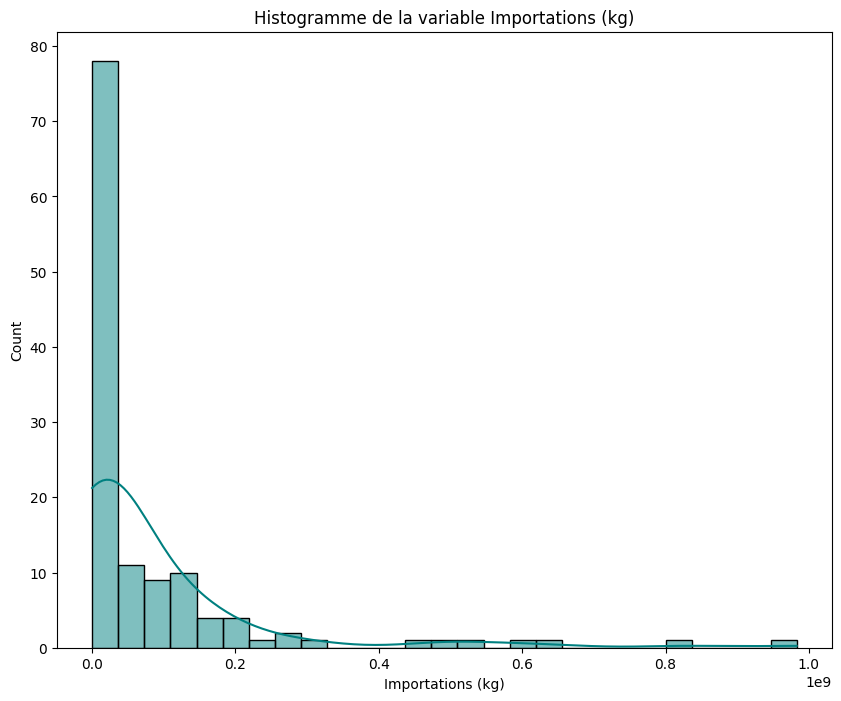

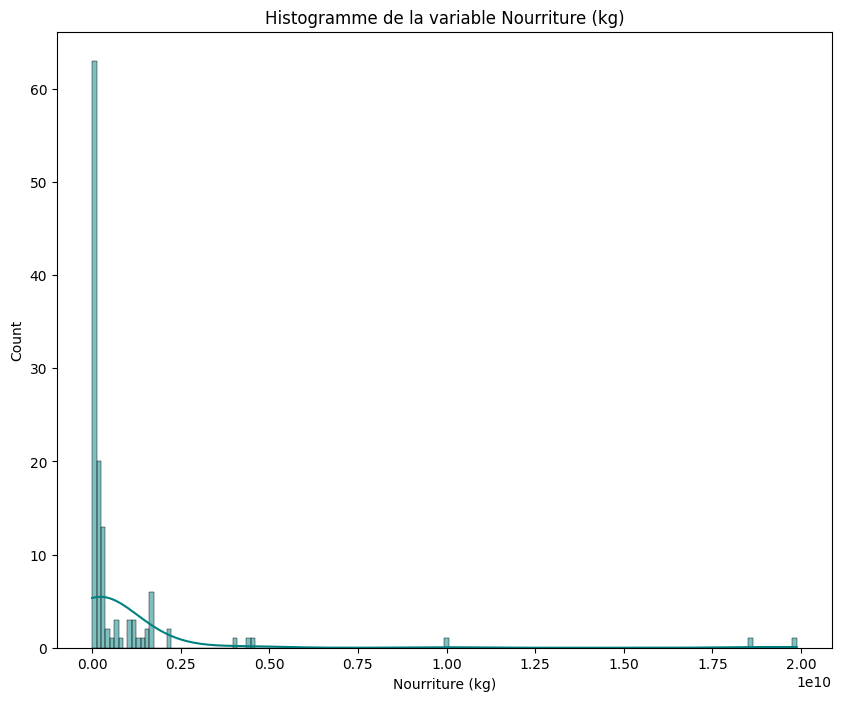

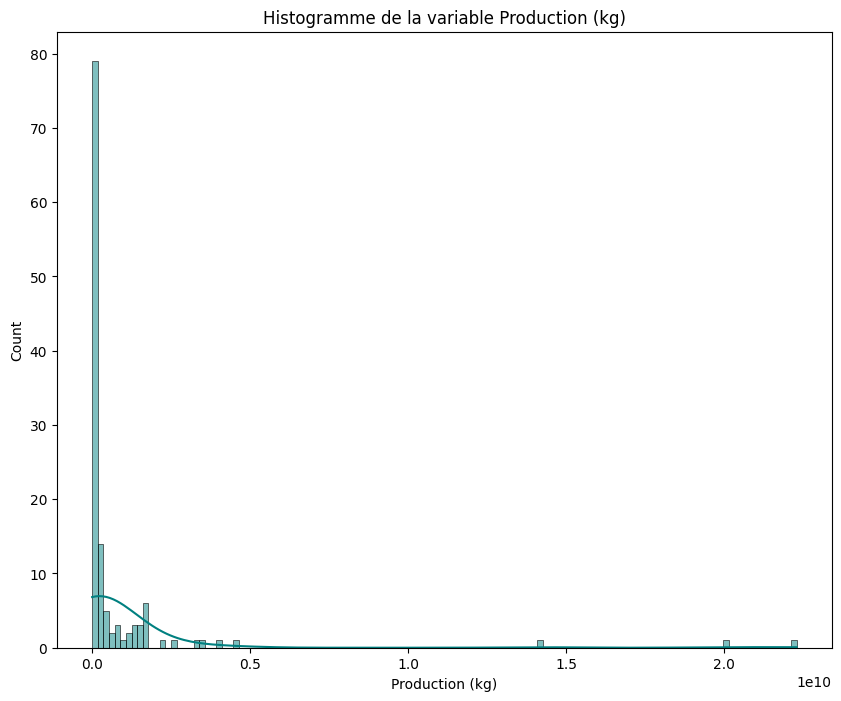

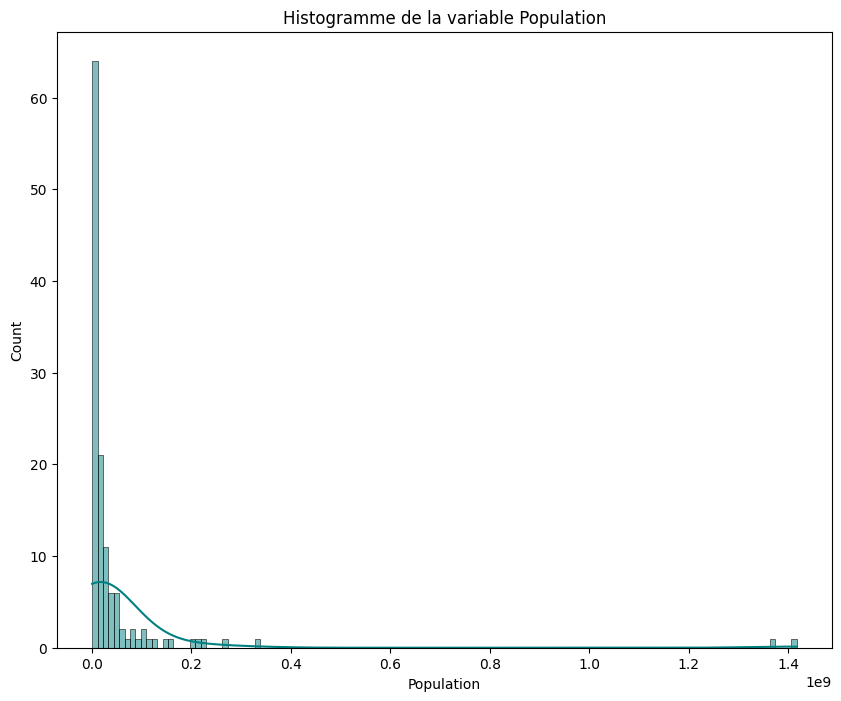

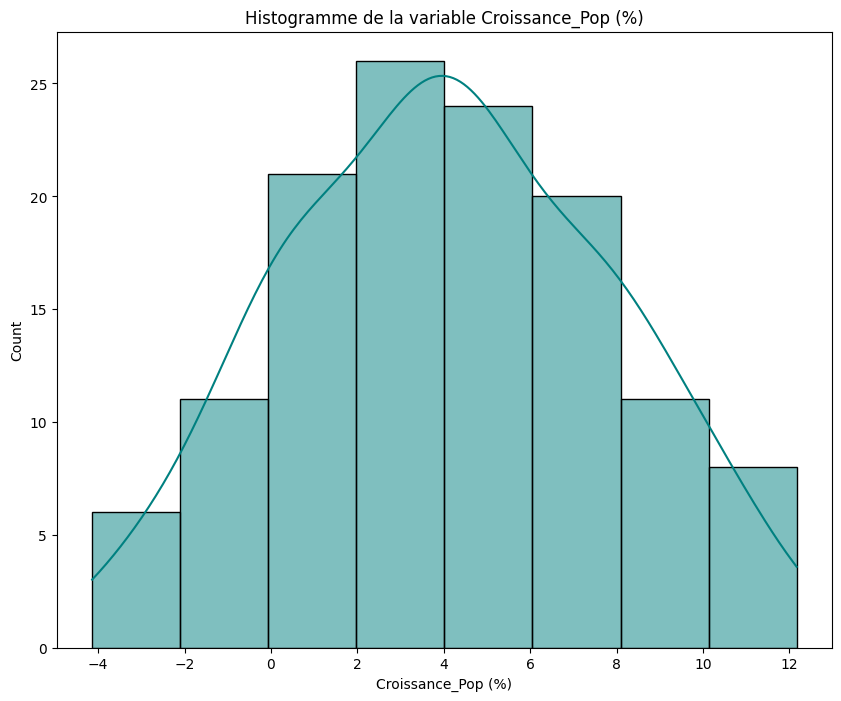

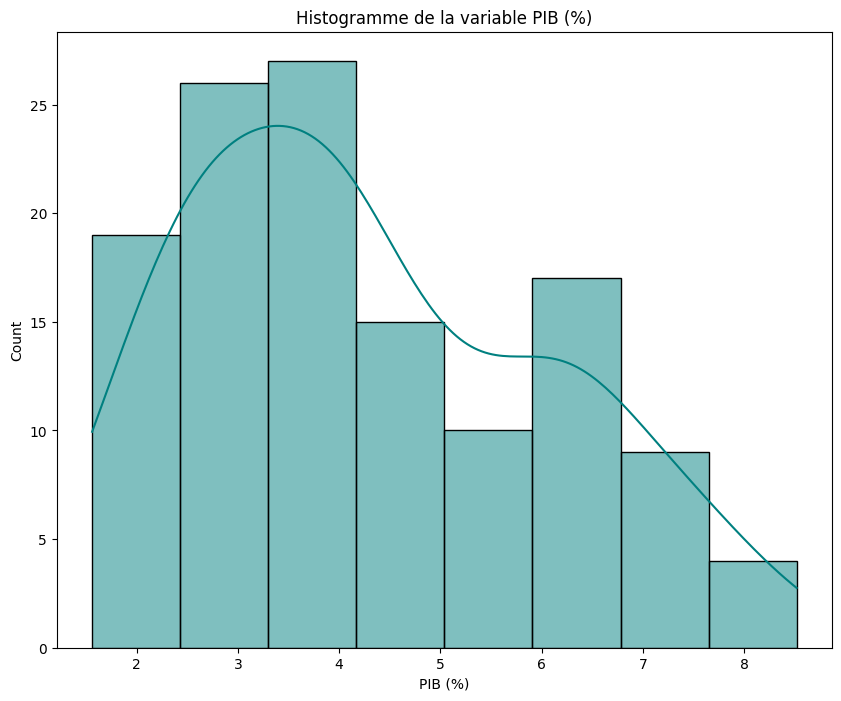

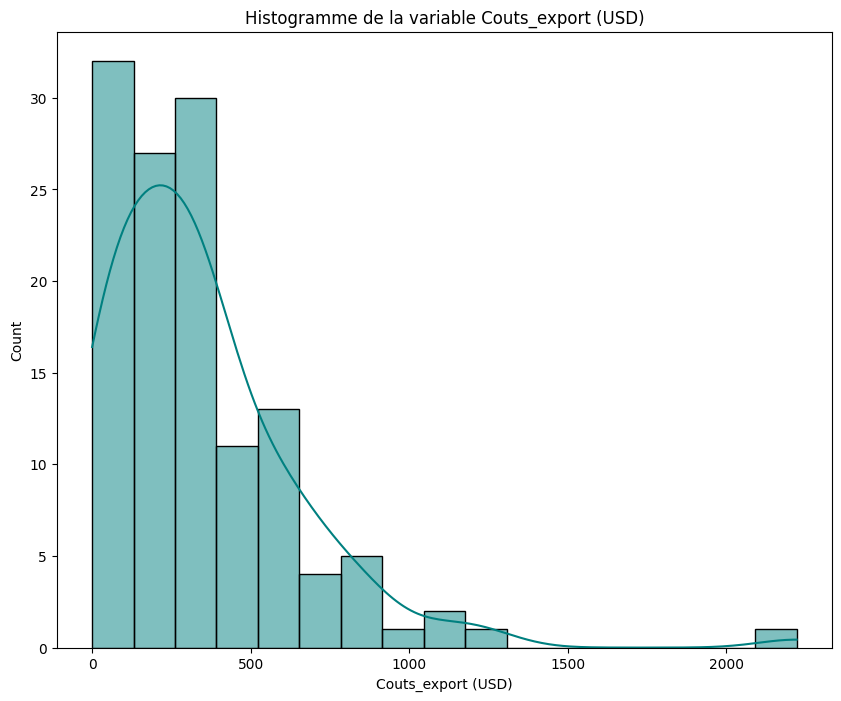

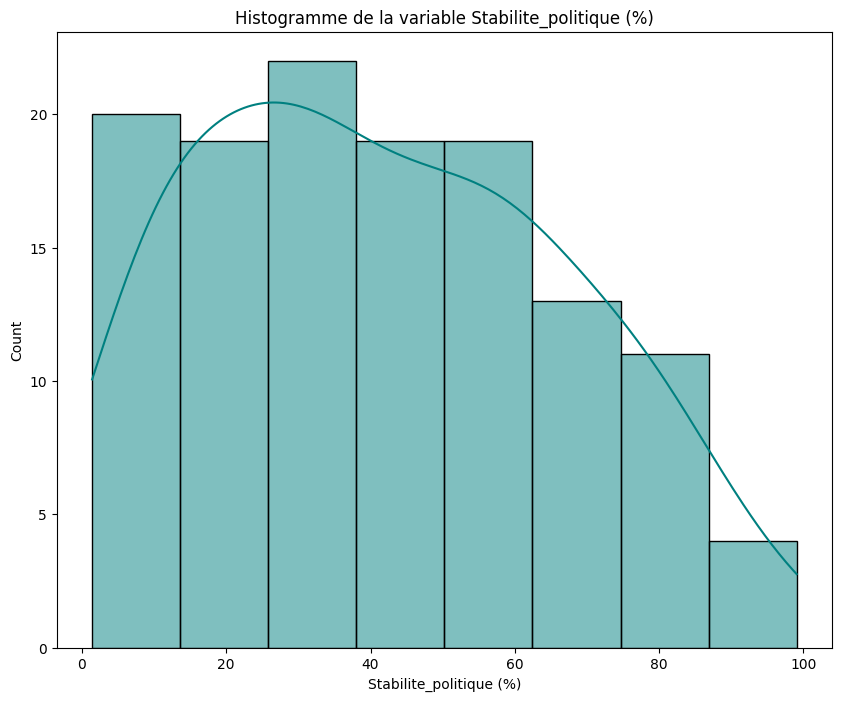

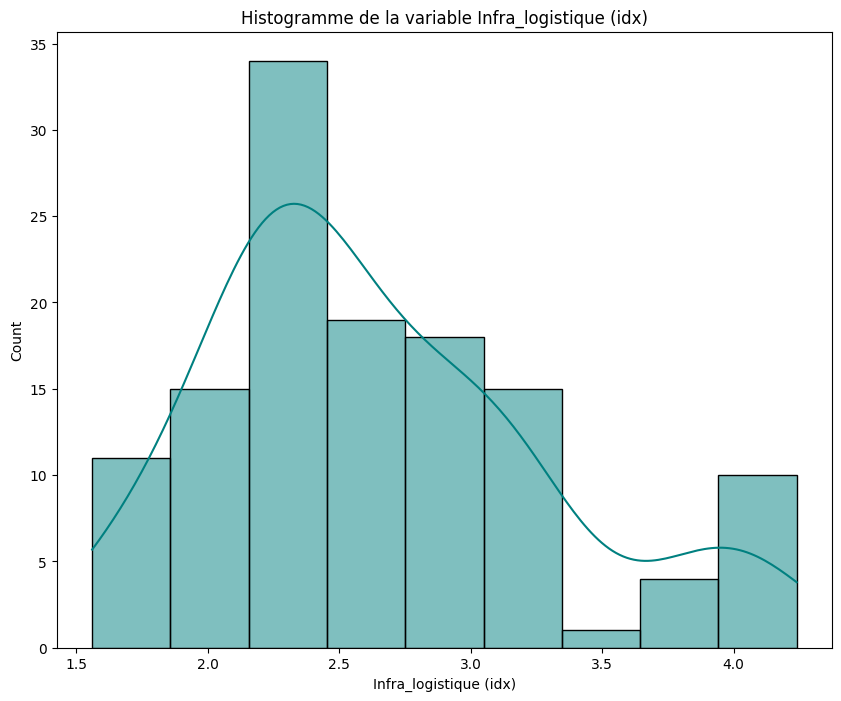

In [107]:
#Vérifier la distribution des valeurs pour chaque colonne

##Création d'un histogramme pour chaque variable
for col in etude_marche.columns[3:]:
   
    plt.figure(figsize=(10,8))
    sns.histplot(data=etude_marche, x=col, kde=True, color="teal")
    plt.title(f"Histogramme de la variable {col}")
    plt.show()


In [120]:
# Afficher les 10 meilleurs pays pour chaque variable



for col in etude_marche.columns[3:]:
    pays_top10= etude_marche[["Pays",col]].nlargest(10,col)
    print(f" Top 10 des pays pour {col} :","\n")
    print(pays_top10[["Pays",col]].to_string(index=False))
    print("\n")
  
    



 Top 10 des pays pour Importations (kg) : 

           Pays  Importations (kg)
        Mexique        983000000.0
      Hong Kong        829000000.0
Arabie saoudite        641000000.0
       Pays-Bas        585000000.0
 Afrique du Sud        515000000.0
          Chine        504000000.0
           Iraq        466000000.0
       Belgique        305000000.0
           Cuba        284000000.0
    Philippines        282000000.0


 Top 10 des pays pour Nourriture (kg) : 

                Pays  Nourriture (kg)
               Chine     1.987700e+10
          États-Unis     1.861800e+10
              Brésil     1.001000e+10
Fédération de Russie     4.558000e+09
             Mexique     4.355000e+09
                Inde     4.094000e+09
      Afrique du Sud     2.156000e+09
           Indonésie     2.115000e+09
            Colombie     1.718000e+09
             Turquie     1.716000e+09


 Top 10 des pays pour Production (kg) : 

                Pays  Production (kg)
          États-Unis     2.

In [122]:
#Afficher les 10 pires pays par colonne


for col in etude_marche.columns[3:]:
    pays_flop10= etude_marche[["Pays",col]].nsmallest(10,col)
    print(f" Flop 10 des pays pour {col} :","\n")
    print(pays_flop10[["Pays",col]].to_string(index=False))
    print("\n")
    

 Flop 10 des pays pour Importations (kg) : 

        Pays  Importations (kg)
  Bangladesh                0.0
     Bolivie                0.0
Burkina Faso                0.0
     Burundi                0.0
        Inde                0.0
   Indonésie                0.0
      Israël                0.0
  Madagascar                0.0
      Malawi                0.0
        Mali                0.0


 Flop 10 des pays pour Nourriture (kg) : 

         Pays  Nourriture (kg)
     Djibouti        3000000.0
      Burundi        5000000.0
 Îles Salomon        5000000.0
Guinée-Bissau        6000000.0
        Tchad        6000000.0
     Eswatini        8000000.0
      Somalie        8000000.0
     Botswana        9000000.0
   Monténégro       11000000.0
      Comores       12000000.0


 Flop 10 des pays pour Production (kg) : 

             Pays  Production (kg)
         Djibouti              0.0
         Mongolie              0.0
     Îles Salomon              0.0
       Cabo Verde        1000000

Importations (kg)


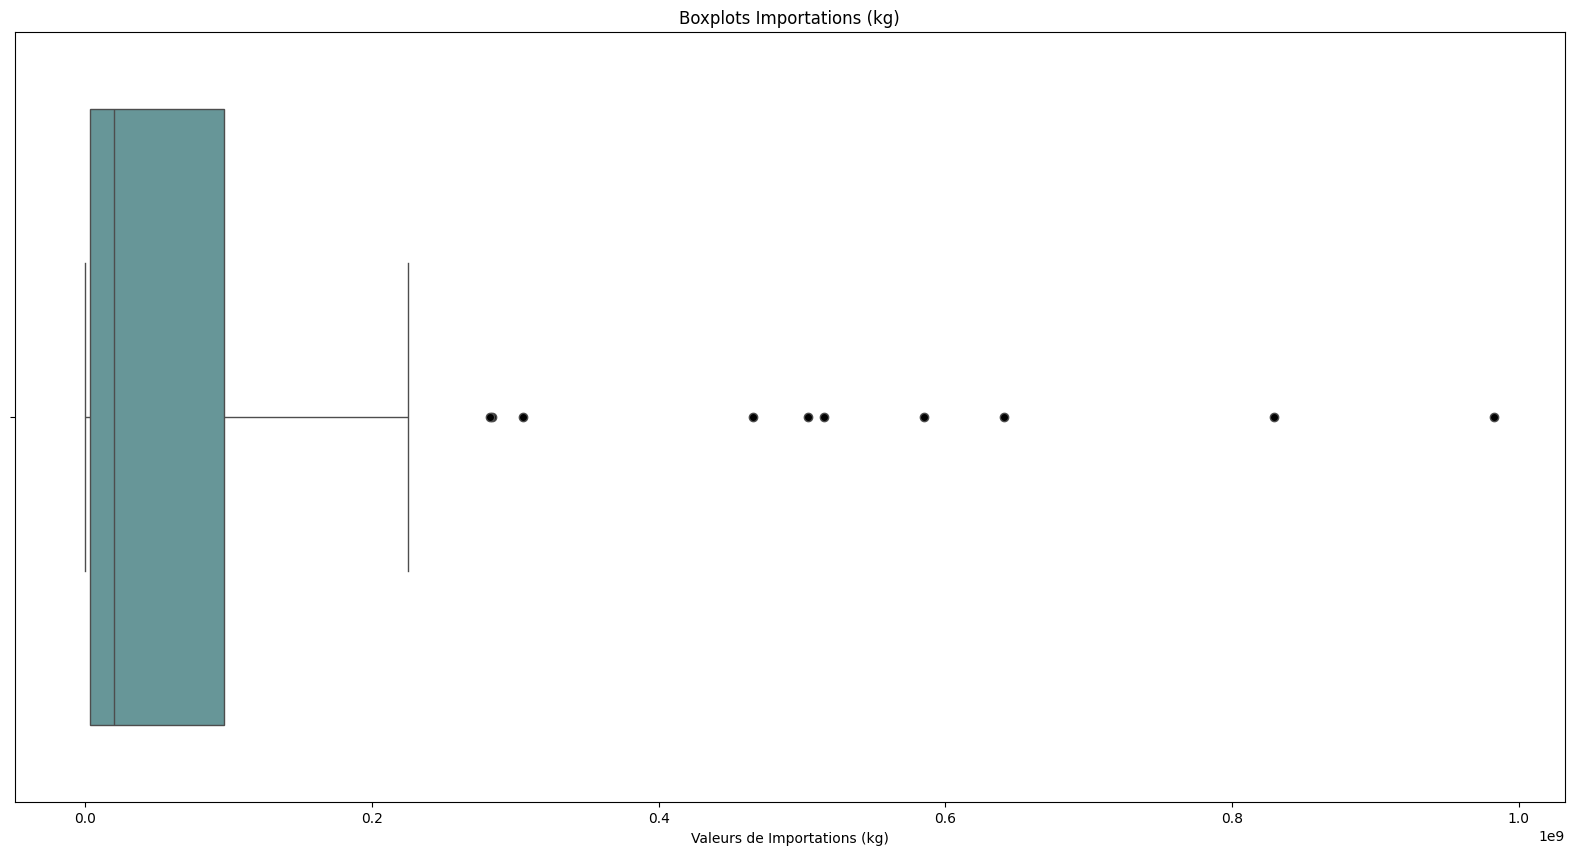

Nourriture (kg)


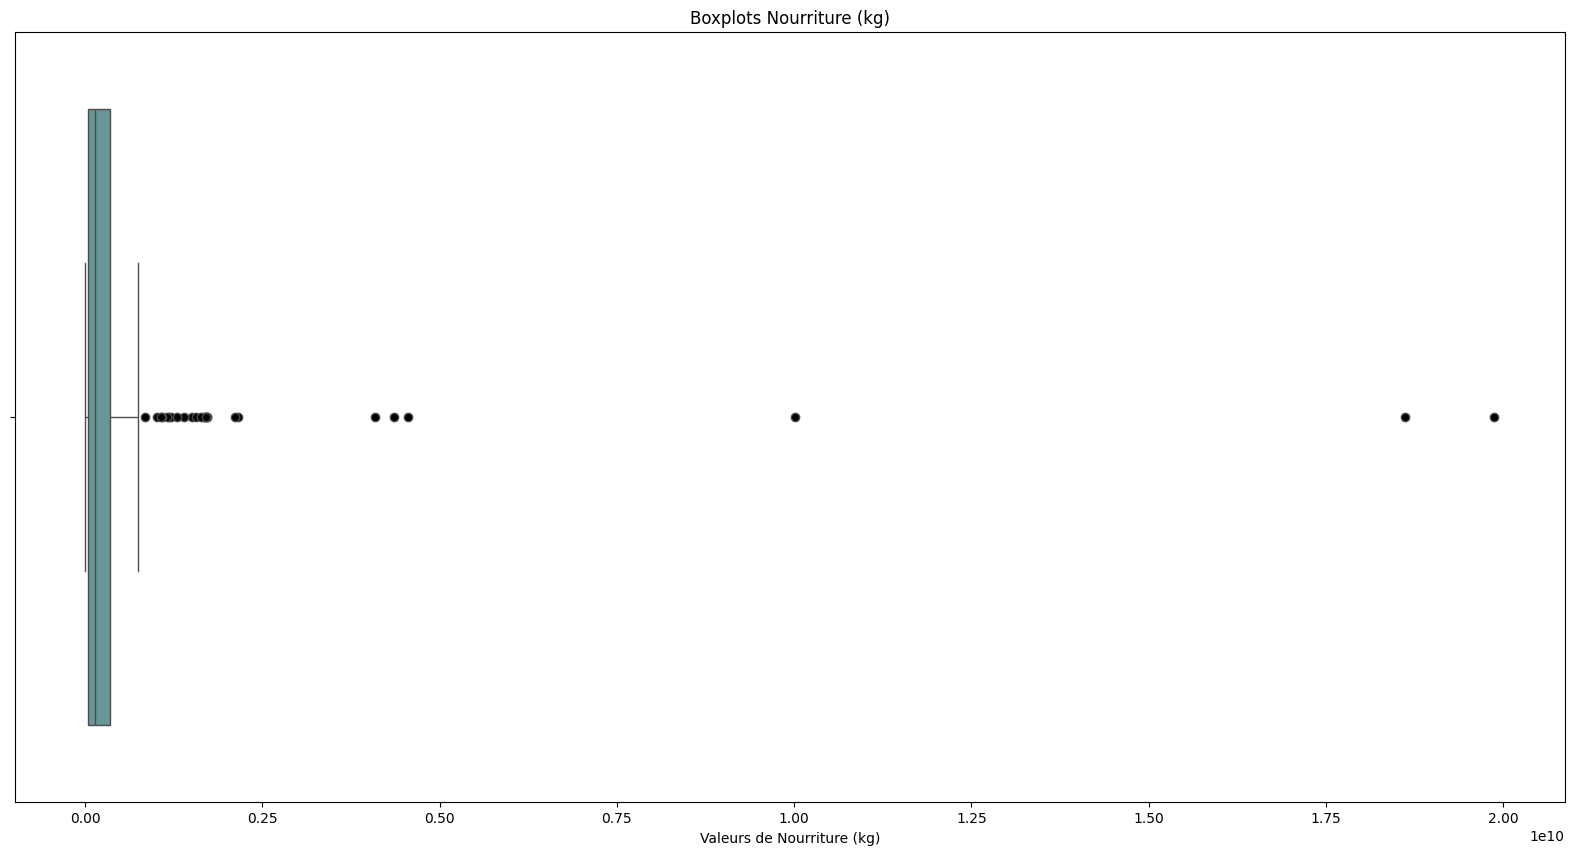

Production (kg)


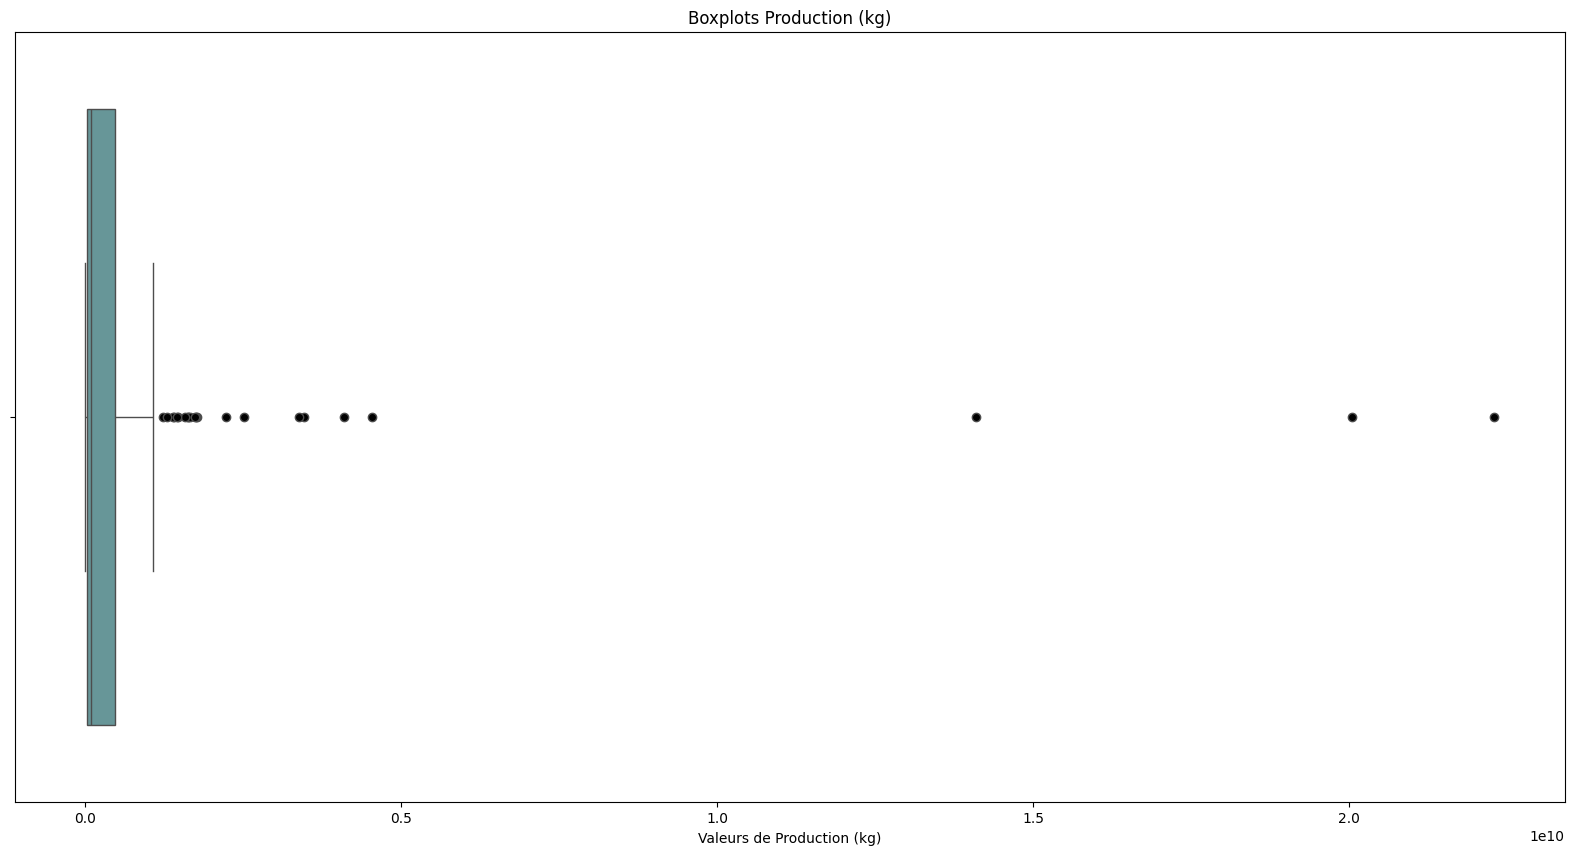

Population


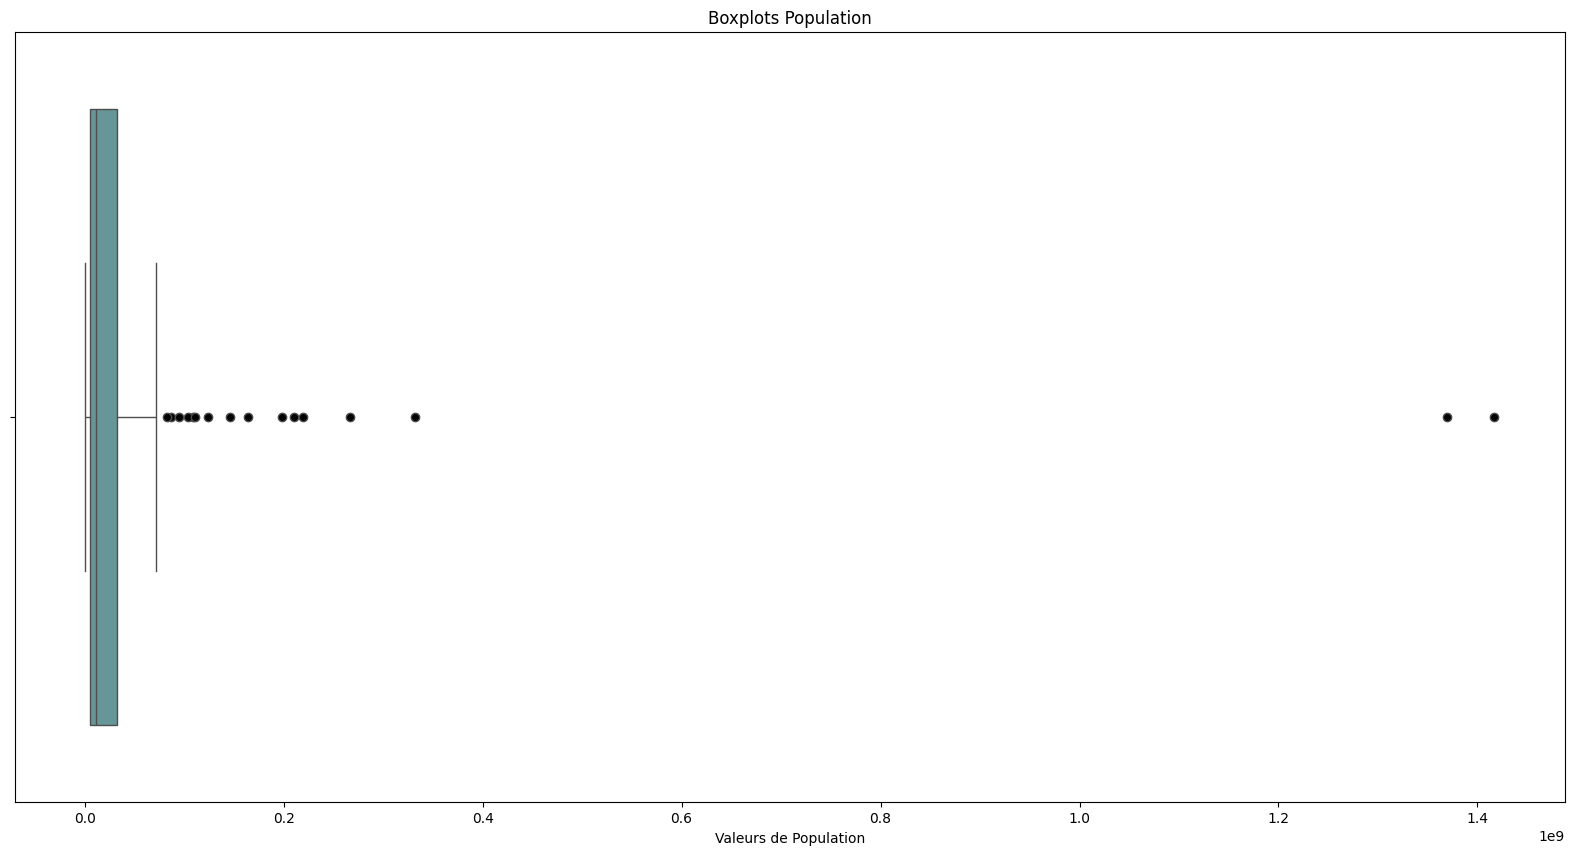

Croissance_Pop (%)


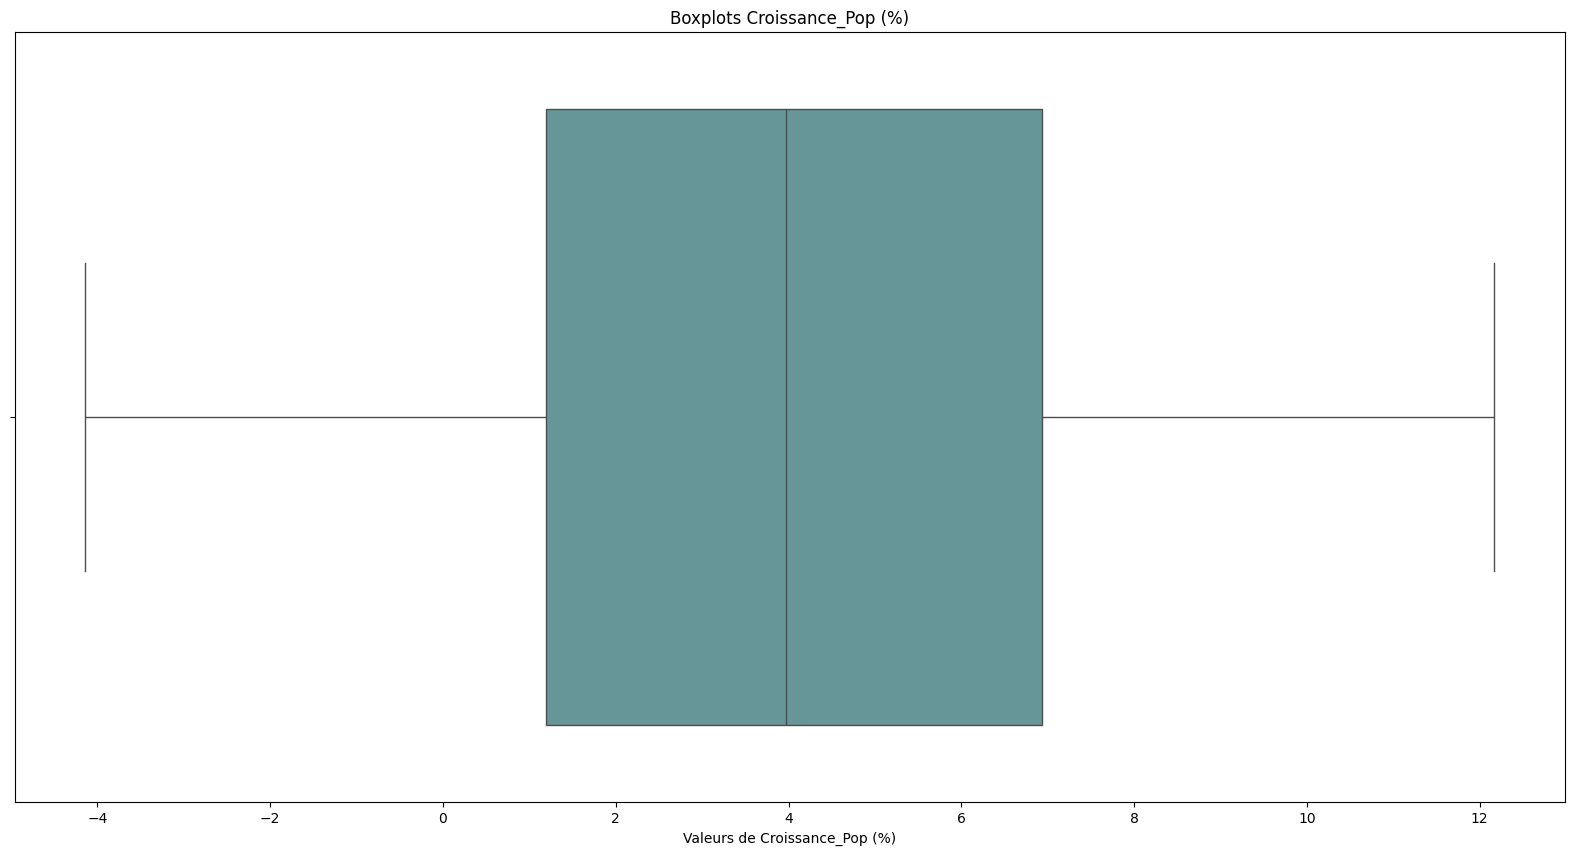

PIB (%)


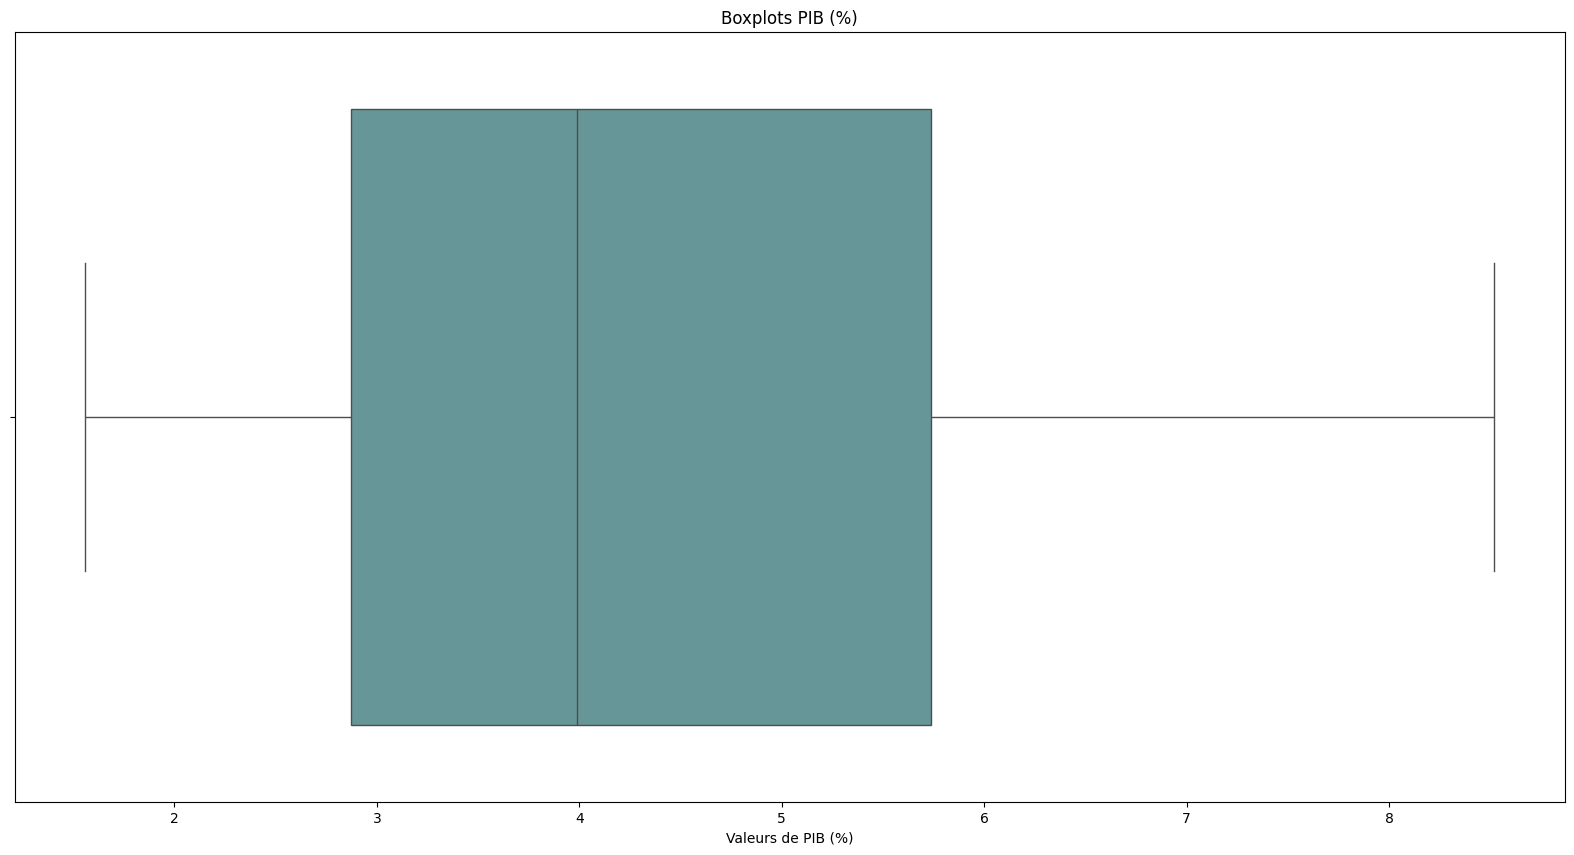

Couts_export (USD)


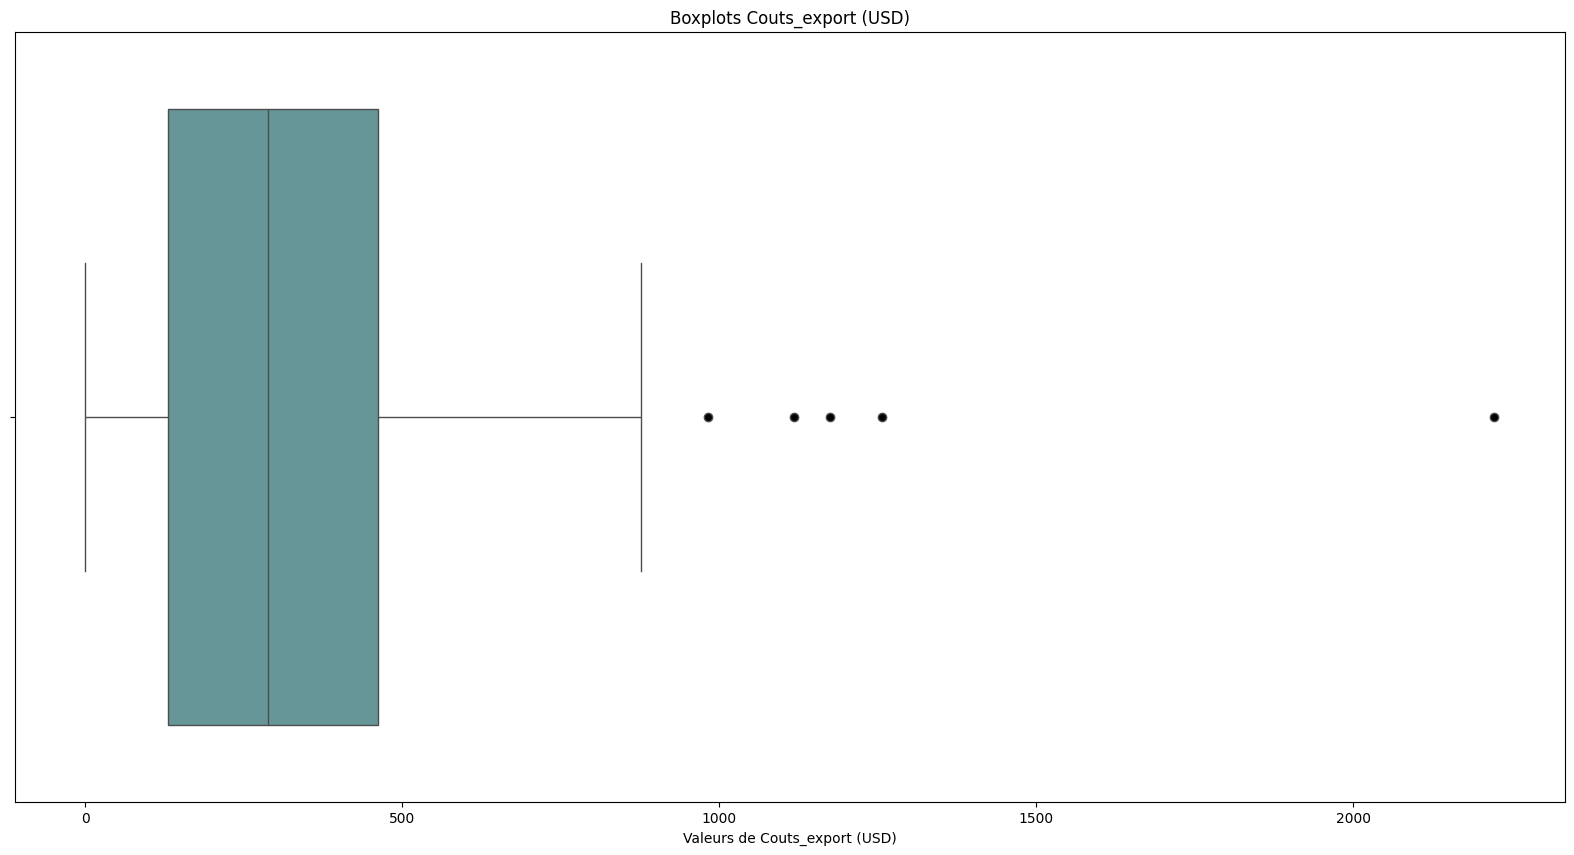

Stabilite_politique (%)


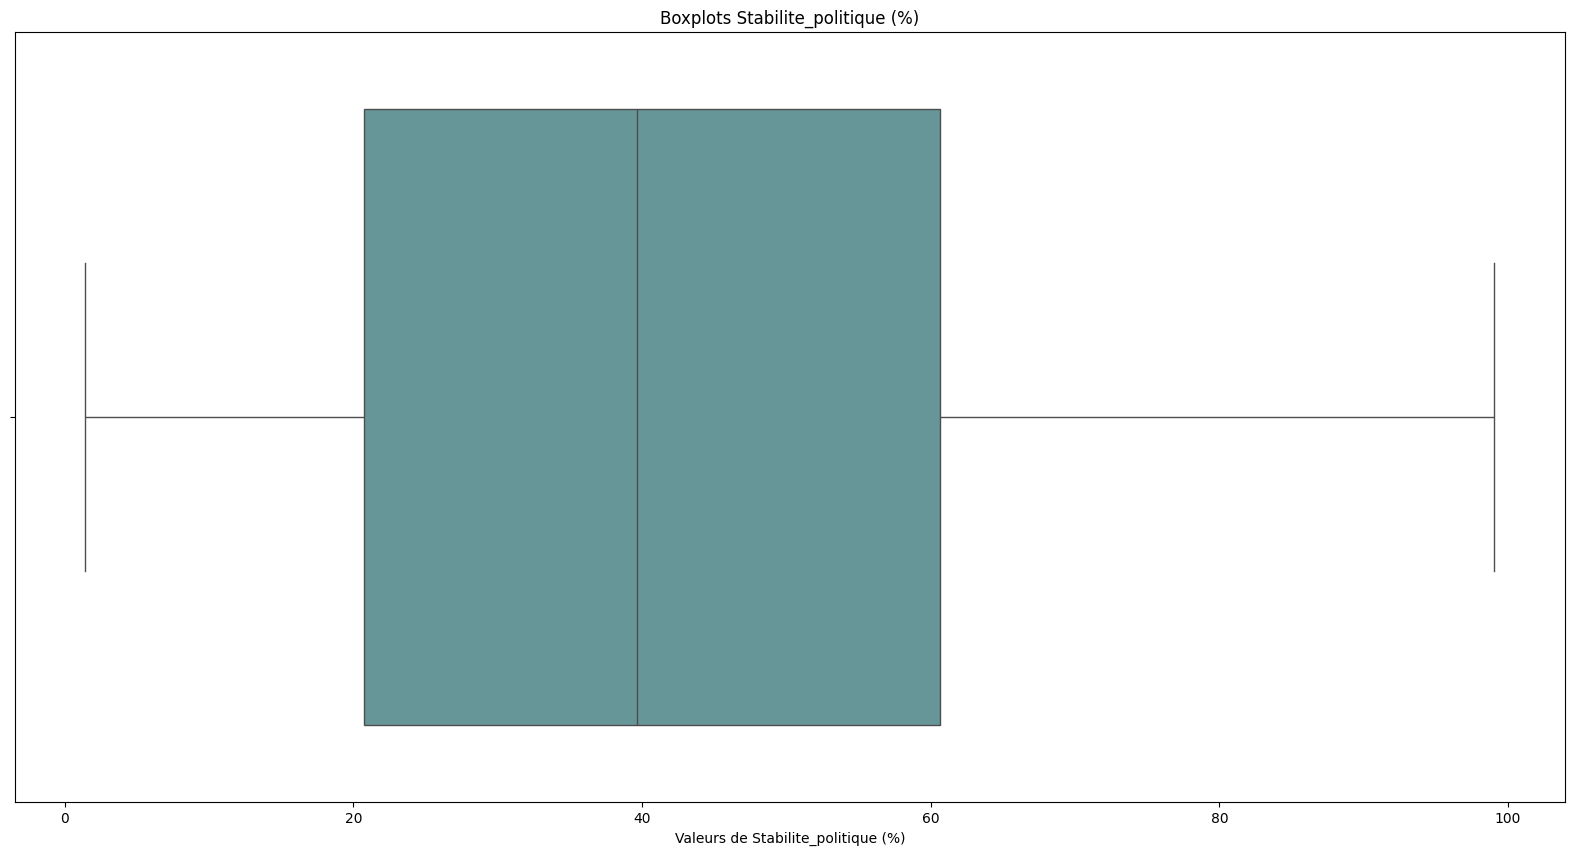

Infra_logistique (idx)


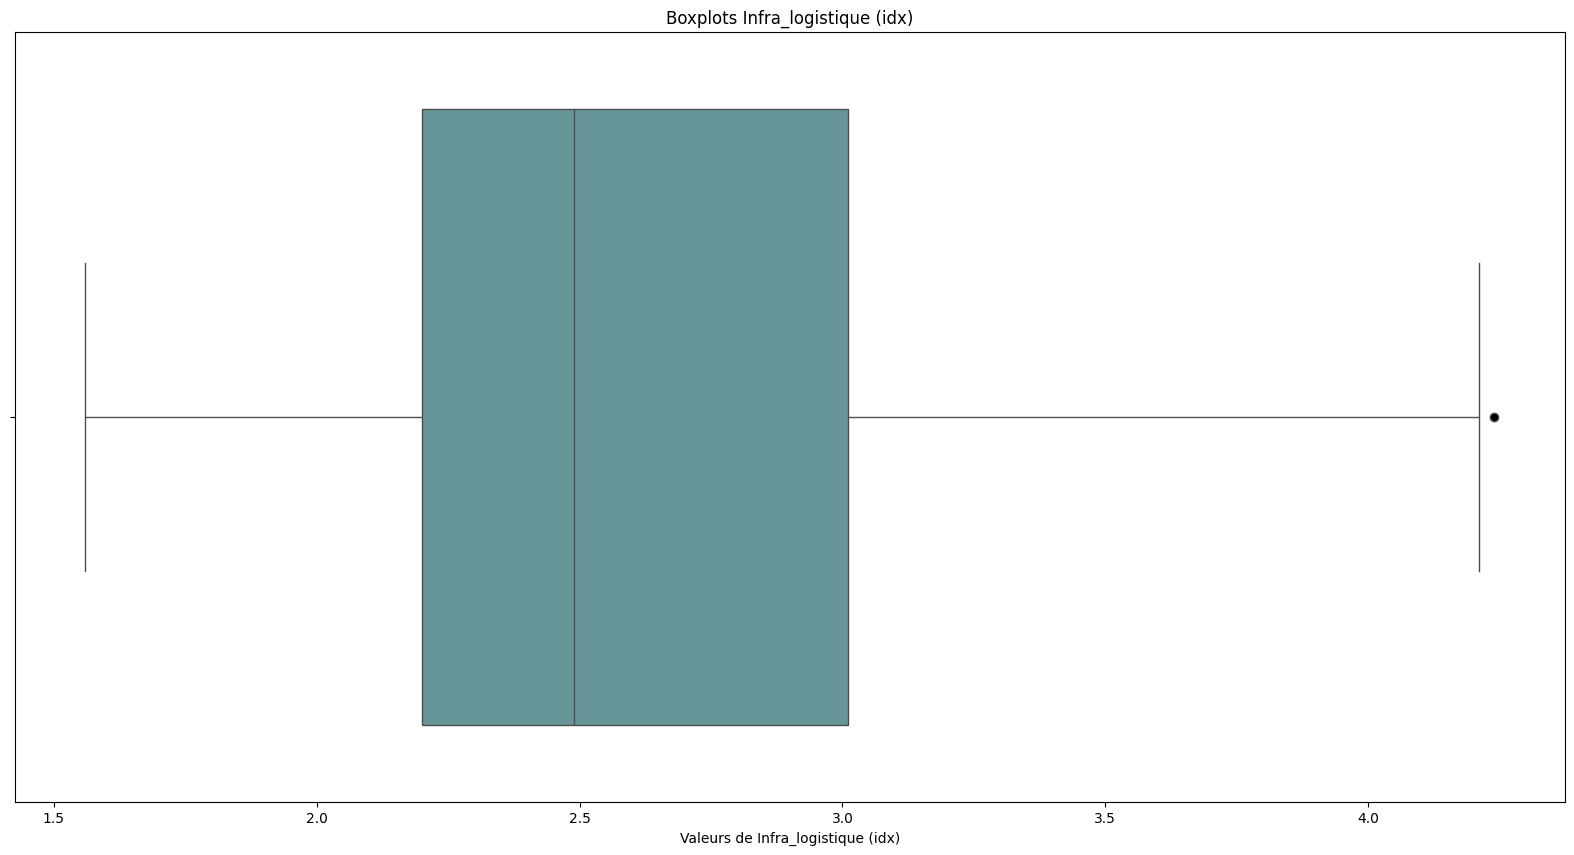

In [123]:
#Réaliser un boxplot pour chaque variable

for col in etude_marche.columns[3:]:
    print(col)
    plt.figure(figsize=(20, 10))
    sns.boxplot(etude_marche[col], orient="h", color="cadetblue",flierprops={"markerfacecolor": "black"})
    plt.xlabel(f'Valeurs de {col}')
    plt.title(f'Boxplots {col}')
    plt.show()

In [124]:
# Afficher le seuil des outliers pour chaque colonne

for col in etude_marche.columns[3:]:
        percent25= etude_marche[col].quantile(0.25)
        percent75= etude_marche[col].quantile(0.75)
        iqr= percent75 - percent25
        limite_sup = percent75 + 1.5 * iqr
        print(col,round(limite_sup,2))

Importations (kg) 236750000.0
Nourriture (kg) 823750000.0
Production (kg) 1152250000.0
Population 73806284.0
Croissance_Pop (%) 15.53
PIB (%) 10.03
Couts_export (USD) 959.66
Stabilite_politique (%) 120.4
Infra_logistique (idx) 4.22


In [113]:
#Afficher les outliers pour chaque colonne

for col in etude_marche.columns[3:]:
    Q1 = etude_marche[col].quantile(0.25)
    Q3 = etude_marche[col].quantile(0.75)
    IQR = Q3 - Q1
    seuil_sup = Q3 + 1.5 * IQR
    
    outliers = etude_marche[etude_marche[col] > seuil_sup]
    
    print(f"Lignes avec outliers pour la colonne {col} :")
    print(outliers[["Pays",col]] if not outliers[col].empty else "Aucun outlier")
    print("\n")



Lignes avec outliers pour la colonne Importations (kg) :
               Pays  Importations (kg)
0    Afrique du Sud        515000000.0
2   Arabie saoudite        641000000.0
7          Belgique        305000000.0
22            Chine        504000000.0
23        Hong Kong        829000000.0
31             Cuba        284000000.0
54             Iraq        466000000.0
73          Mexique        983000000.0
88         Pays-Bas        585000000.0
89      Philippines        282000000.0


Lignes avec outliers pour la colonne Nourriture (kg) :
                     Pays  Nourriture (kg)
0          Afrique du Sud     2.156000e+09
2         Arabie saoudite     1.181000e+09
4               Australie     1.211000e+09
11                 Brésil     1.001000e+10
20                 Canada     1.501000e+09
22                  Chine     1.987700e+10
25               Colombie     1.718000e+09
28           Corée du Sud     1.019000e+09
36                Espagne     1.560000e+09
40   Fédération de Russie  

In [126]:
#Analyser les corrélations entre les variables avec outliers

etude_marche_corr = etude_marche[['Importations (kg)', 'Nourriture (kg)', 'Production (kg)',
       'Population', 'Croissance_Pop (%)', 'PIB (%)', 'Couts_export (USD)',
       'Stabilite_politique (%)',"Infra_logistique (idx)"]].corr()

etude_marche_corr

,Importations (kg),Nourriture (kg),Production (kg),Population,Croissance_Pop (%),PIB (%),Couts_export (USD),Stabilite_politique (%),Infra_logistique (idx)
Importations (kg),1.000000,0.282608,0.219187,0.168484,-0.134774,-0.231164,0.058830,0.074007,0.378451
Nourriture (kg),0.282608,1.000000,0.988663,0.686716,-0.116768,-0.029291,0.036841,-0.042505,0.305458
Production (kg),0.219187,0.988663,1.000000,0.637103,-0.127007,-0.041173,0.025350,-0.028491,0.310262
Population,0.168484,0.686716,0.637103,1.000000,-0.036449,0.161774,0.031640,-0.169452,0.168066
Croissance_Pop (%),-0.134774,-0.116768,-0.127007,-0.036449,1.000000,0.228497,0.470232,-0.446080,-0.375784
PIB (%),-0.231164,-0.029291,-0.041173,0.161774,0.228497,1.000000,-0.014231,-0.156906,-0.271366
Couts_export (USD),0.058830,0.036841,0.025350,0.031640,0.470232,-0.014231,1.000000,-0.340498,-0.312876
Stabilite_politique (%),0.074007,-0.042505,-0.028491,-0.169452,-0.446080,-0.156906,-0.340498,1.000000,0.551090
Infra_logistique (idx),0.378451,0.305458,0.310262,0.168066,-0.375784,-0.271366,-0.312876,0.551090,1.000000


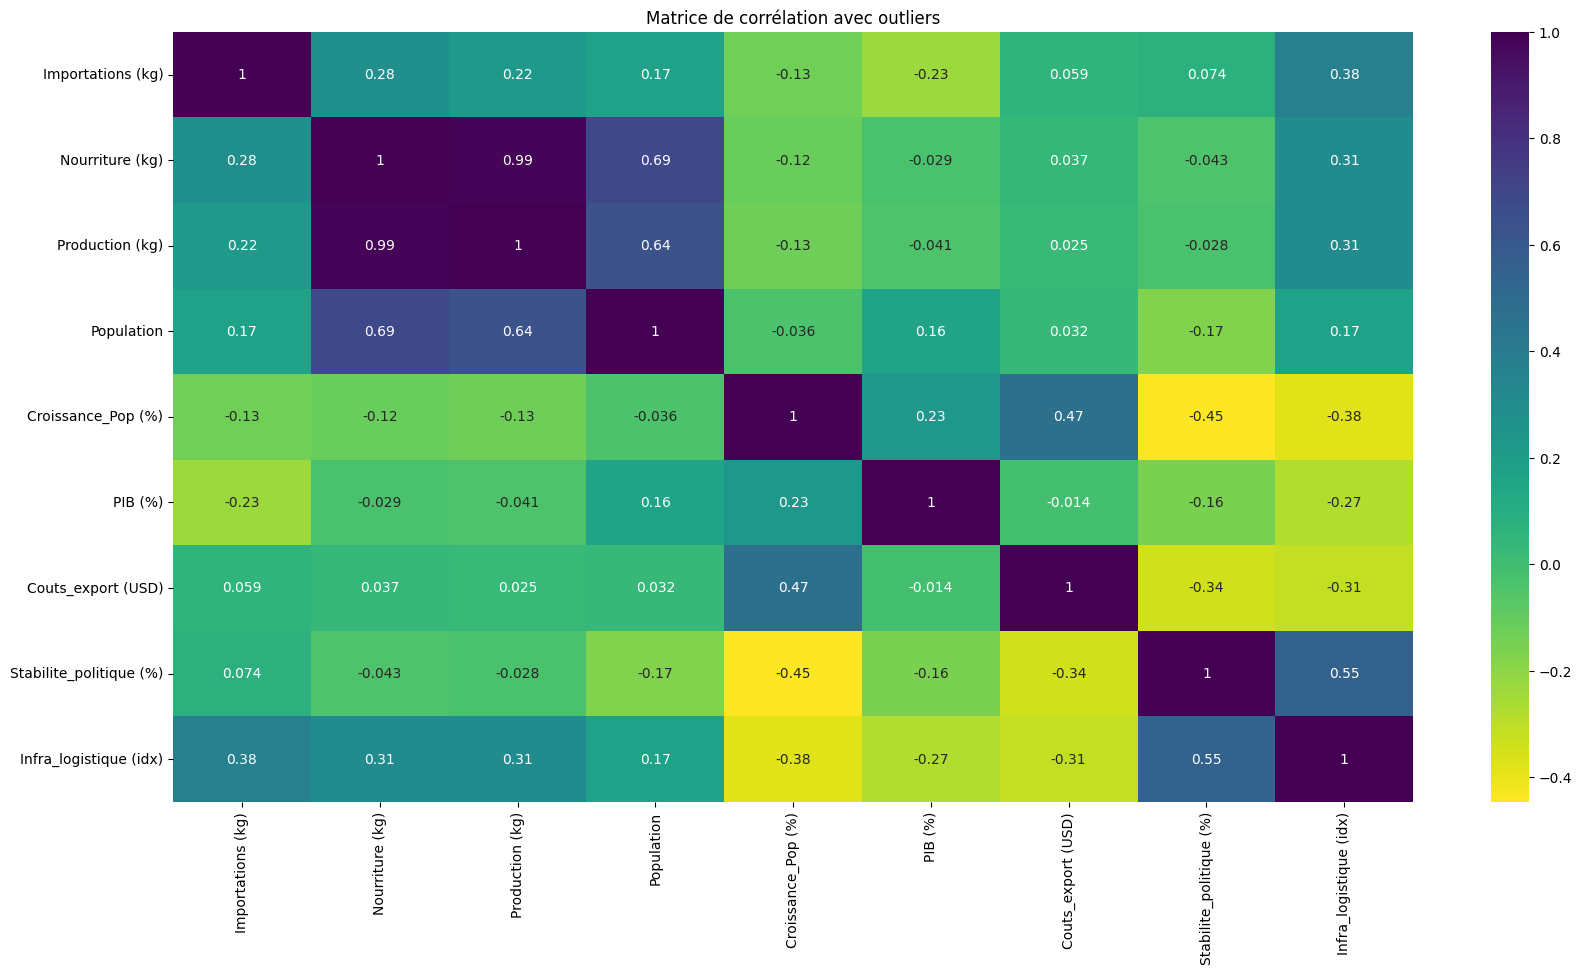

In [127]:
#Visualiser avec un heatmap
plt.figure(figsize=(20,10))
sns.heatmap(etude_marche_corr,annot=True, cmap="viridis_r")
plt.title("Matrice de corrélation avec outliers")
plt.show()



Selon le graphique il y a corrélation entre:\
Nourriture et Production  : 0.99\
Nourriture et Population  : 0.69\
Production et Population  : 0.64\
Stabilité politique et Infra_logistique: 0.55\


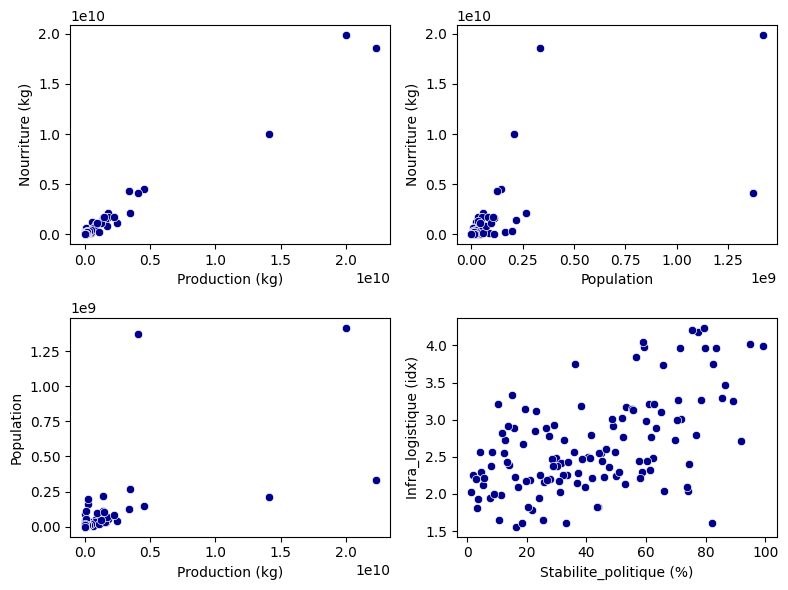

In [128]:
#Visualiser les variables corrélées

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.scatterplot(etude_marche,x="Production (kg)", y="Nourriture (kg)", color="darkblue")

plt.subplot(2,2,2)
sns.scatterplot(etude_marche, x="Population",y="Nourriture (kg)",color="darkblue")

plt.subplot(2,2,3)
sns.scatterplot(etude_marche, x="Production (kg)",y="Population",color="darkblue")

plt.subplot(2,2,4)
sns.scatterplot(etude_marche, x="Stabilite_politique (%)",y="Infra_logistique (idx)",color="darkblue")
                
               
plt.tight_layout()

In [129]:
#Retirer les outliers du jeu de données

etude_sans_outliers = etude_marche[(etude_marche["Population"]<=73806284) &(etude_marche["Production (kg)"]<=1152250000)
                                  &(etude_marche["Nourriture (kg)"]<=823750000) &(etude_marche["Importations (kg)"]<=236750000)
                                  &(etude_marche["Couts_export (USD)"]<=959.66) 
                                   &(etude_marche["Infra_logistique (idx)"]<=4.22)]
                                  


In [130]:
#Analyser les corrélations sans les outliers

no_outliers_corr = etude_sans_outliers[['Importations (kg)', 'Nourriture (kg)', 'Production (kg)',
       'Population', 'Croissance_Pop (%)', 'PIB (%)', 'Couts_export (USD)',
       'Stabilite_politique (%)',"Infra_logistique (idx)"]].corr()

no_outliers_corr

,Importations (kg),Nourriture (kg),Production (kg),Population,Croissance_Pop (%),PIB (%),Couts_export (USD),Stabilite_politique (%),Infra_logistique (idx)
Importations (kg),1.000000,0.420018,0.240571,0.035476,-0.170298,-0.054620,-0.074870,0.247220,0.386180
Nourriture (kg),0.420018,1.000000,0.937817,0.305130,-0.121989,-0.161010,-0.131307,0.044163,0.316668
Production (kg),0.240571,0.937817,1.000000,0.267858,-0.186898,-0.148599,-0.216494,0.108565,0.348702
Population,0.035476,0.305130,0.267858,1.000000,0.388702,0.174195,0.053256,-0.414846,-0.112257
Croissance_Pop (%),-0.170298,-0.121989,-0.186898,0.388702,1.000000,0.226731,0.500511,-0.471515,-0.364202
PIB (%),-0.054620,-0.161010,-0.148599,0.174195,0.226731,1.000000,0.027813,-0.089244,-0.160742
Couts_export (USD),-0.074870,-0.131307,-0.216494,0.053256,0.500511,0.027813,1.000000,-0.265978,-0.402506
Stabilite_politique (%),0.247220,0.044163,0.108565,-0.414846,-0.471515,-0.089244,-0.265978,1.000000,0.609425
Infra_logistique (idx),0.386180,0.316668,0.348702,-0.112257,-0.364202,-0.160742,-0.402506,0.609425,1.000000


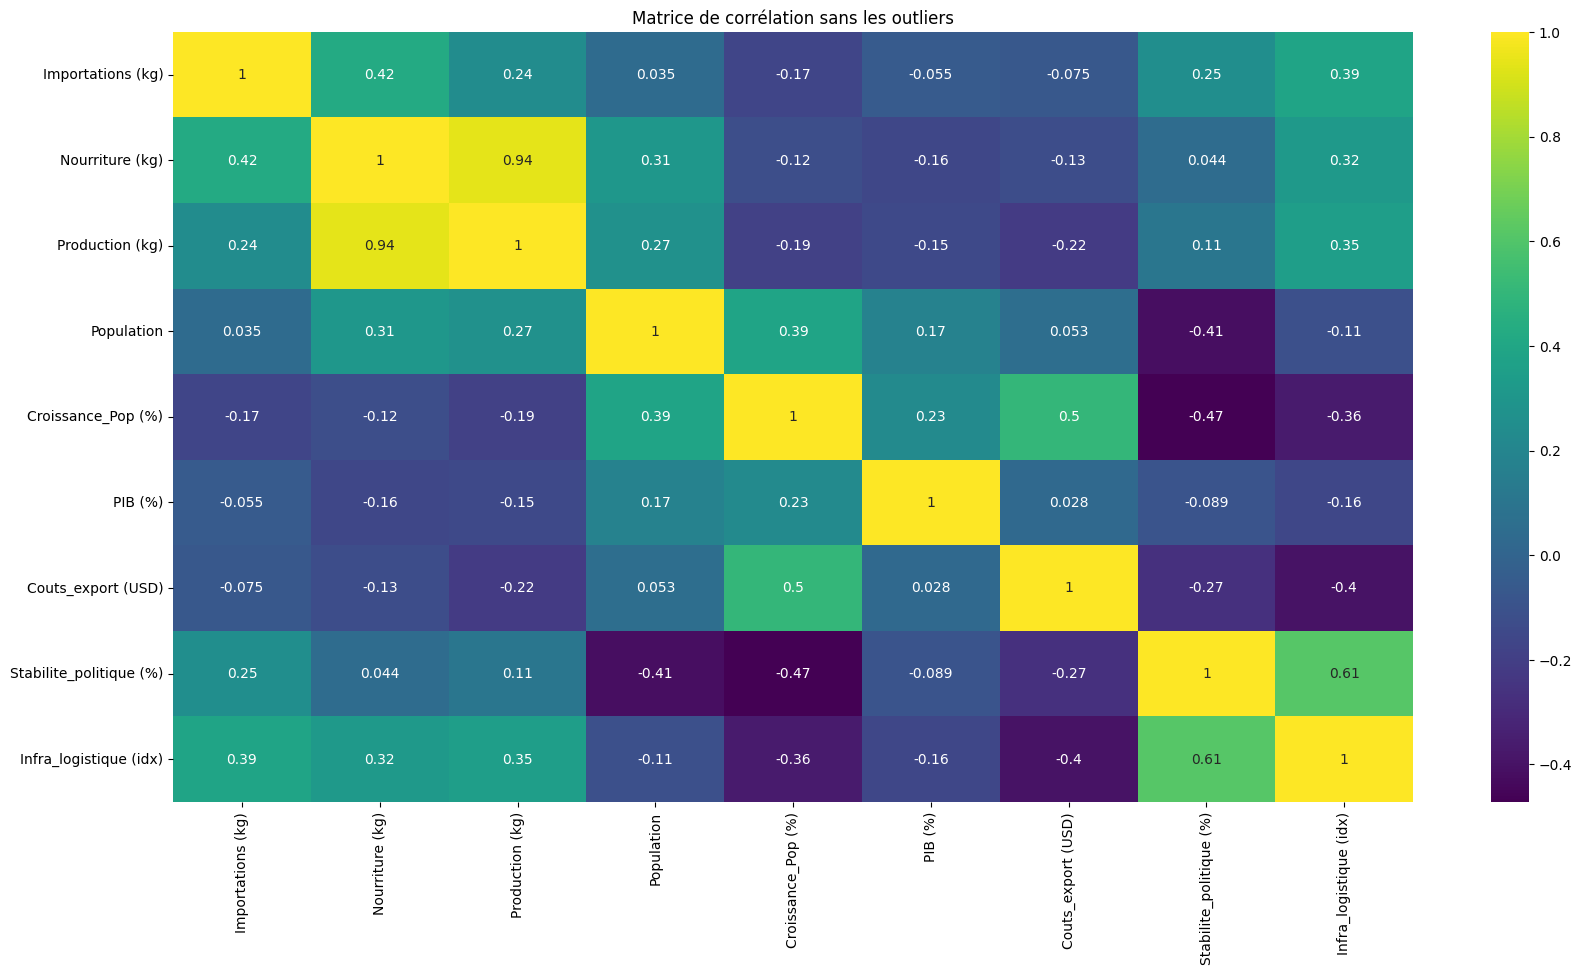

In [131]:
##Visualiser avec un heatmap
plt.figure(figsize=(20,10))
sns.heatmap(no_outliers_corr,annot=True, cmap="viridis")
plt.title("Matrice de corrélation sans les outliers")
plt.show()

il y a une corrélation positive entre:\
Nourriture et Production  : 0.94\
Croissance_Pop et Couts_exportations: 0.5\
Stabilité politique et infra_logistique: 0.61\


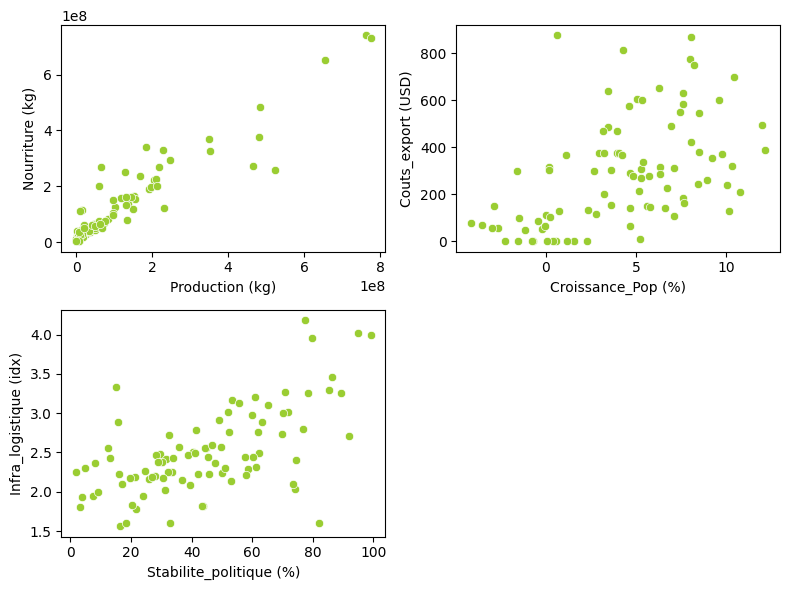

In [132]:
#Visualiser les variables corrélées

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.scatterplot(etude_sans_outliers,x="Production (kg)", y="Nourriture (kg)", color="yellowgreen")


plt.subplot(2,2,2)
sns.scatterplot(etude_sans_outliers, x="Croissance_Pop (%)",y="Couts_export (USD)",color="yellowgreen")

plt.subplot(2,2,3)
sns.scatterplot(etude_sans_outliers, x="Stabilite_politique (%)",y="Infra_logistique (idx)",color="yellowgreen")
                
               
plt.tight_layout()

In [122]:
#Exporter le dataframe dans un fichier CSV pour réaliser la partie 2 
etude_marche.to_csv("etude_marche.csv")